In [18]:
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt
import re

In [19]:
def extract_tables_from_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Regex pattern to match the operation tables and adjacency matrices
    operation_pattern = re.compile(r"Operation Table:\s*(\[\[.*?\]\])", re.DOTALL)
    adjacency_pattern = re.compile(r"Adjacency Matrix:\s*(\[\[.*?\]\])", re.DOTALL)

    # Extract all operation tables and adjacency matrices
    operation_tables = operation_pattern.findall(content)
    adjacency_matrices = adjacency_pattern.findall(content)

    # Convert the string representations into actual lists
    operation_tables = [table for table in operation_tables]
    adjacency_matrices = [matrix for matrix in adjacency_matrices]

    # Create a DataFrame with the parsed data
    df = pd.DataFrame({
        "Operation Table": operation_tables,
        "Adjacency Matrix": adjacency_matrices
    })

    return df

# Replace 'path_to_your_file.txt' with the path to your input file
file_path = 'adjacency_4x4_all_diagonal.txt'
df = extract_tables_from_file(file_path)

# Display the generated table
df=df.sort_values(["Operation Table","Adjacency Matrix"])

# Optionally save the table to a CSV file
df.to_csv('output_diagonal.csv', index=False)

In [20]:
op=pd.read_csv("output_diagonal.csv")

In [21]:
op["Operation Table"].value_counts()

Operation Table
[[0,0,1,1],[2,2,3,3],[0,0,1,1],[2,2,3,3]]    6
[[0,0,1,1],[3,3,2,2],[3,3,2,2],[0,0,1,1]]    6
[[0,2,0,2],[0,2,0,2],[1,3,1,3],[1,3,1,3]]    6
[[0,2,0,2],[3,1,3,1],[3,1,3,1],[0,2,0,2]]    6
[[0,3,3,0],[0,3,3,0],[1,2,2,1],[1,2,2,1]]    6
[[0,3,3,0],[2,1,1,2],[0,3,3,0],[2,1,1,2]]    6
[[1,3,1,3],[2,0,2,0],[2,0,2,0],[1,3,1,3]]    6
[[1,2,2,1],[3,0,0,3],[1,2,2,1],[3,0,0,3]]    6
[[3,3,2,2],[1,1,0,0],[3,3,2,2],[1,1,0,0]]    6
[[3,1,3,1],[3,1,3,1],[2,0,2,0],[2,0,2,0]]    6
[[2,2,3,3],[1,1,0,0],[1,1,0,0],[2,2,3,3]]    6
[[2,1,1,2],[2,1,1,2],[3,0,0,3],[3,0,0,3]]    6
[[1,1,1,1],[1,0,3,2],[1,3,3,1],[1,2,1,2]]    4
[[1,0,3,2],[0,0,0,0],[3,0,3,0],[2,0,0,2]]    4
[[1,3,3,1],[3,0,3,0],[3,3,3,3],[1,0,3,2]]    4
[[1,2,1,2],[2,0,0,2],[1,0,3,2],[2,2,2,2]]    4
[[2,2,2,2],[2,3,3,2],[2,3,0,1],[2,2,1,1]]    4
[[2,2,1,1],[2,3,0,1],[1,0,0,1],[1,1,1,1]]    4
[[2,3,3,2],[3,3,3,3],[3,3,0,0],[2,3,0,1]]    4
[[2,3,0,1],[3,3,0,0],[0,0,0,0],[1,0,0,1]]    4
[[3,2,1,0],[2,2,0,0],[1,0,1,0],[0,0,0,0]]   

In [22]:
len(pd.unique(op["Operation Table"]))

24

In [23]:
op

Operation Table  \
0    [[0,0,1,1],[2,2,3,3],[0,0,1,1],[2,2,3,3]]   
1    [[0,0,1,1],[2,2,3,3],[0,0,1,1],[2,2,3,3]]   
2    [[0,0,1,1],[2,2,3,3],[0,0,1,1],[2,2,3,3]]   
3    [[0,0,1,1],[2,2,3,3],[0,0,1,1],[2,2,3,3]]   
4    [[0,0,1,1],[2,2,3,3],[0,0,1,1],[2,2,3,3]]   
..                                         ...   
115  [[3,3,2,2],[1,1,0,0],[3,3,2,2],[1,1,0,0]]   
116  [[3,3,3,3],[3,2,3,2],[3,3,1,1],[3,2,1,0]]   
117  [[3,3,3,3],[3,2,3,2],[3,3,1,1],[3,2,1,0]]   
118  [[3,3,3,3],[3,2,3,2],[3,3,1,1],[3,2,1,0]]   
119  [[3,3,3,3],[3,2,3,2],[3,3,1,1],[3,2,1,0]]   

                              Adjacency Matrix  
0    [[1,1,0,0],[0,1,1,1],[1,1,1,0],[0,0,1,1]]  
1    [[1,1,0,1],[0,1,1,1],[1,1,1,0],[1,0,1,1]]  
2    [[1,1,0,1],[1,1,1,1],[1,1,1,0],[0,1,1,1]]  
3    [[1,1,1,0],[0,1,1,1],[1,1,1,1],[1,0,1,1]]  
4    [[1,1,1,0],[1,1,1,1],[1,1,1,1],[0,1,1,1]]  
..                                         ...  
115  [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]  
116  [[1,0,0,1],[0,1,1,1],[0,1,1,1],[1,1,1,1]]  
117  [[1,0,1,1],[0,1,1,1],[1,1,1,1],[1,1,1,1]]  
118  [[1,1,0,1],[1,1,1,1],[0,1,1,1],[1,1,1,1]]  
119  [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]  

[120 rows x 2 columns]

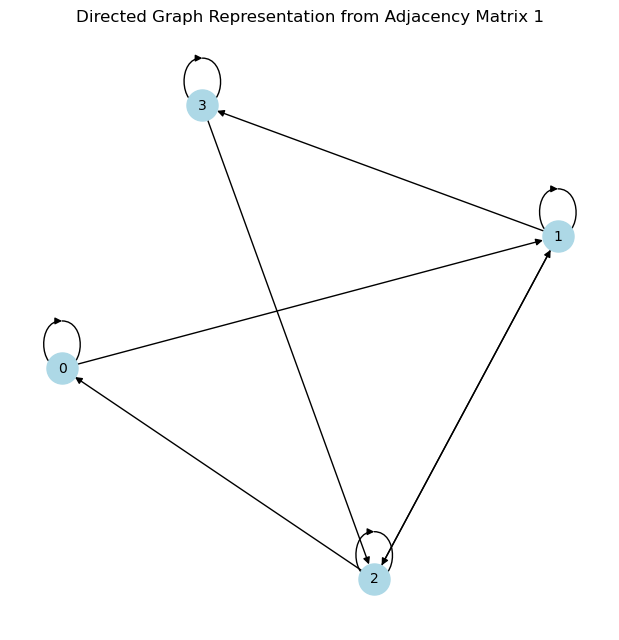

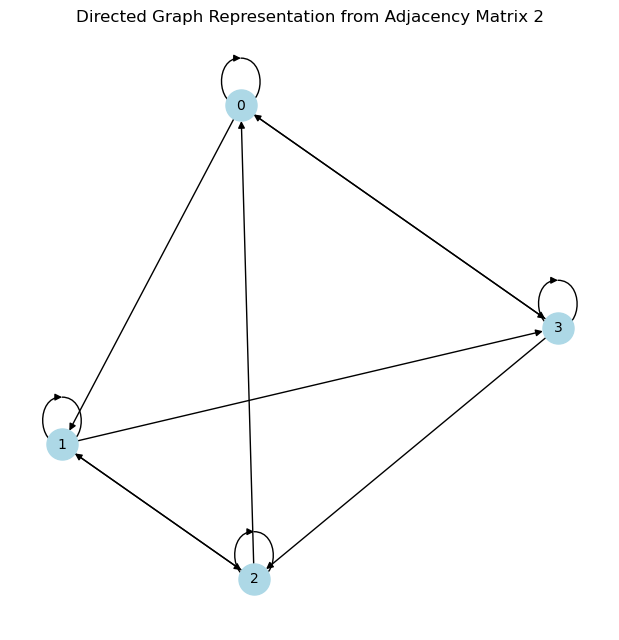

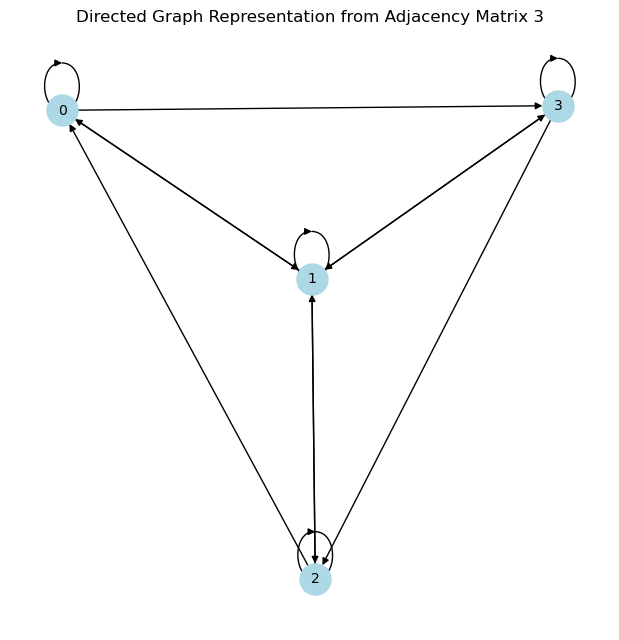

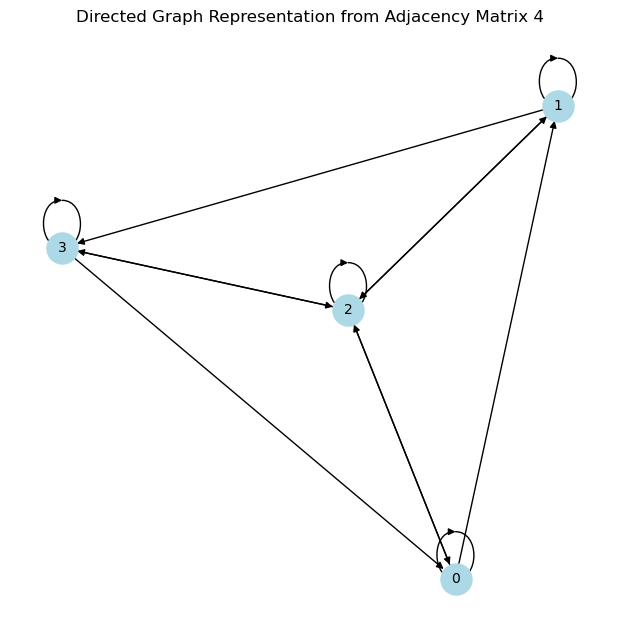

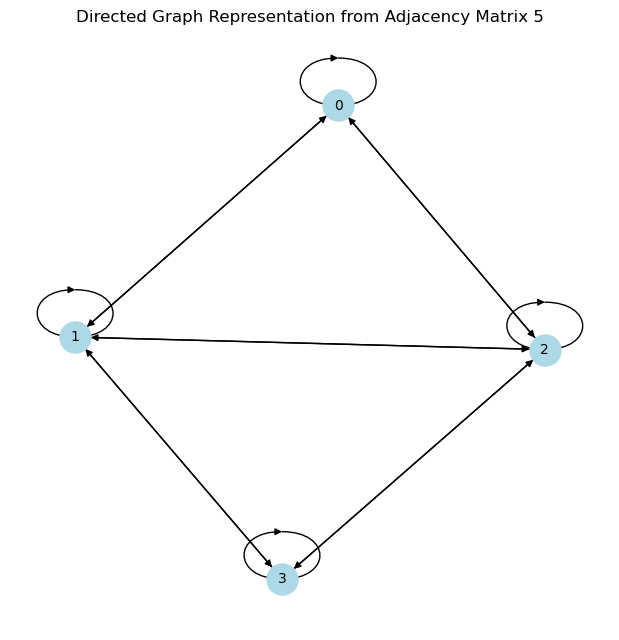

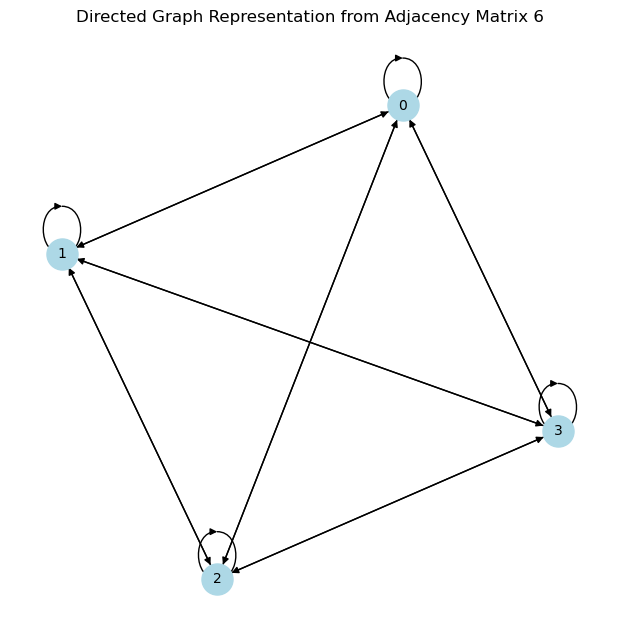

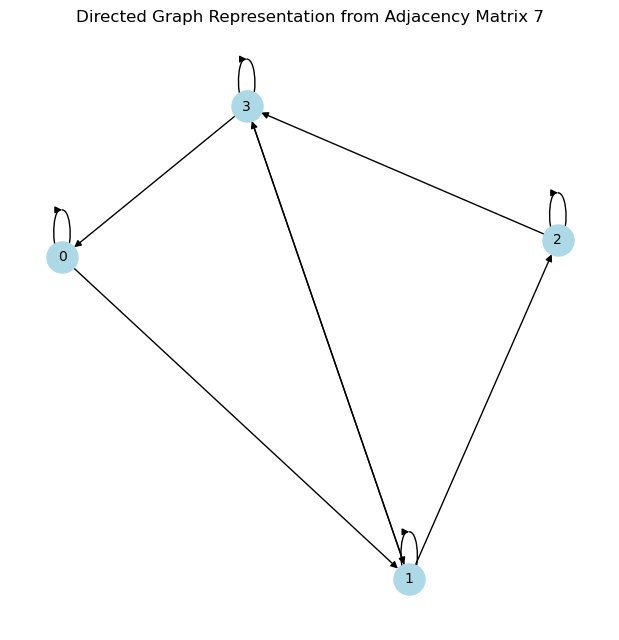

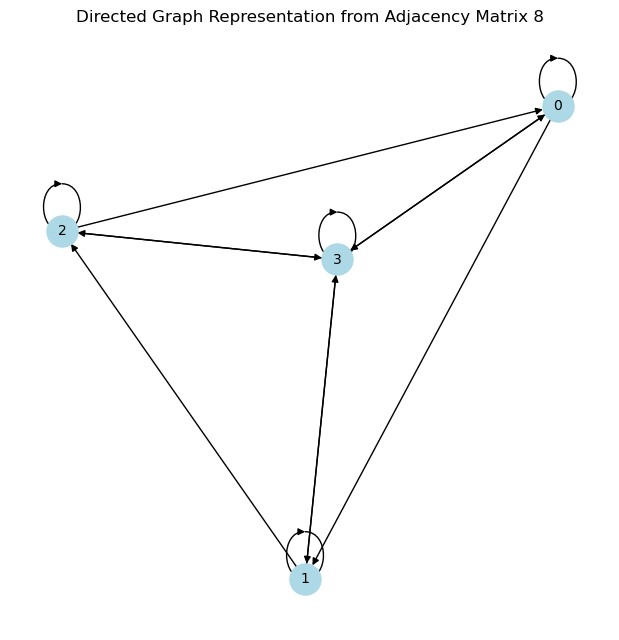

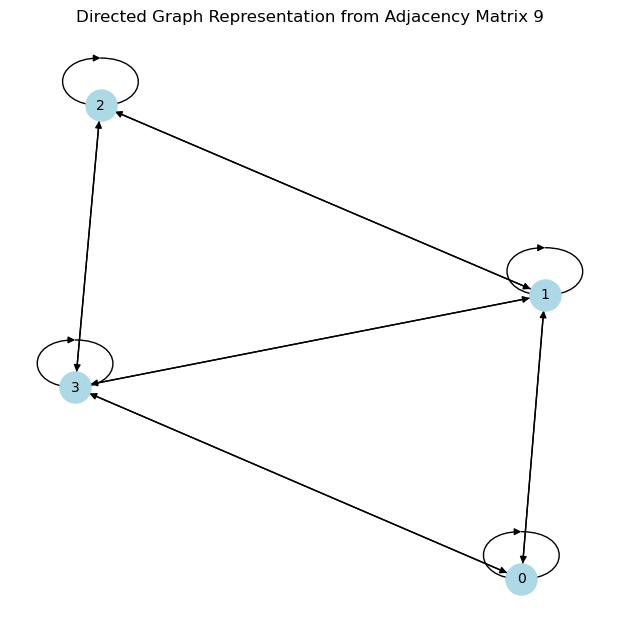

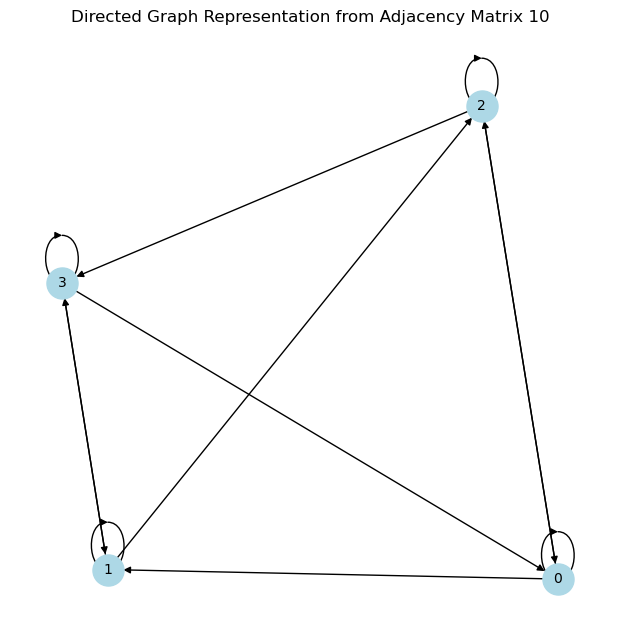

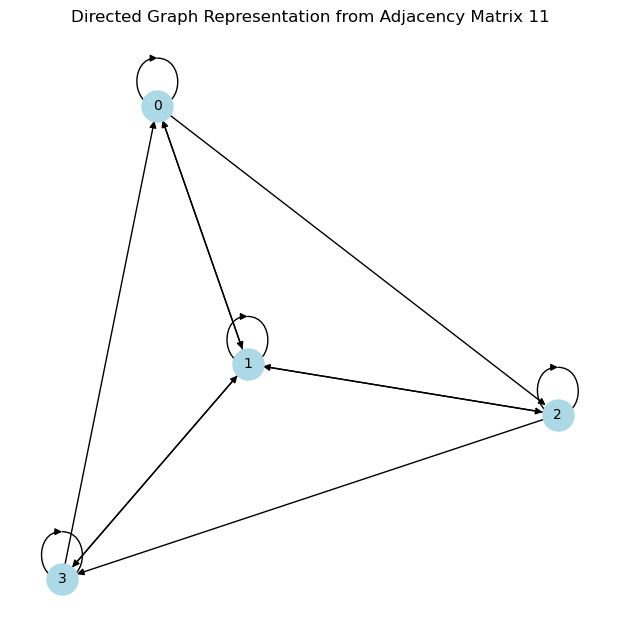

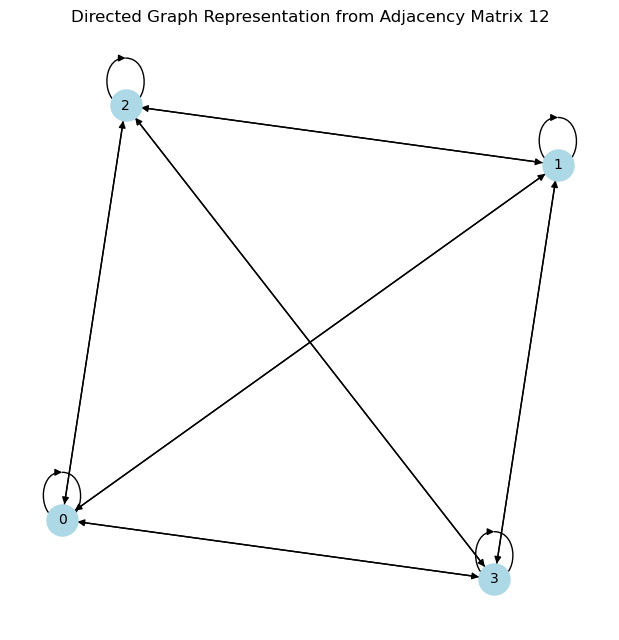

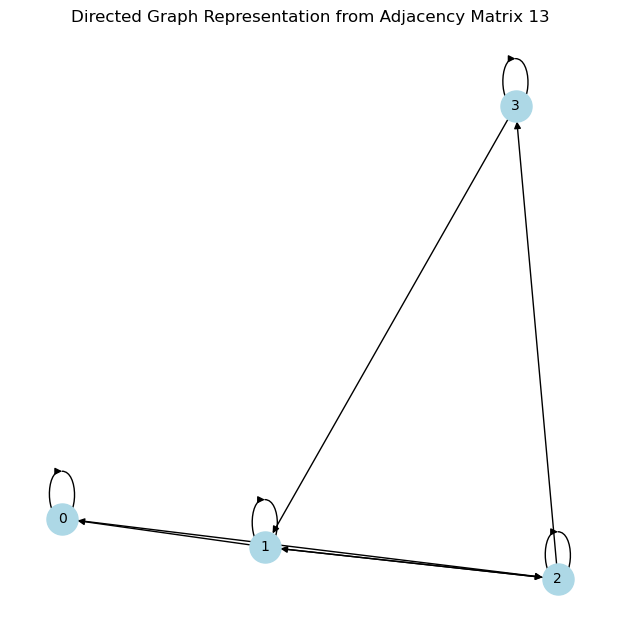

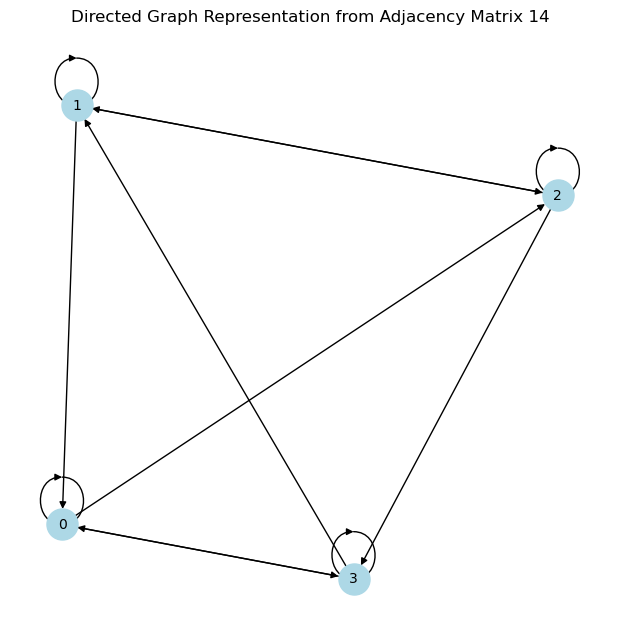

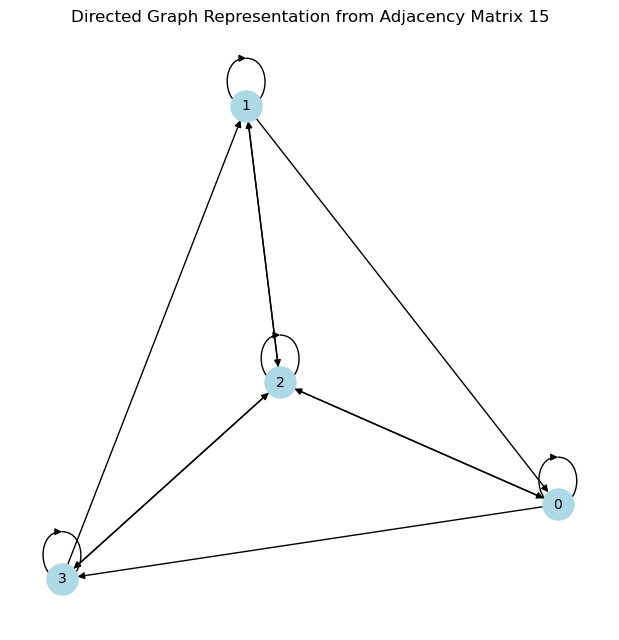

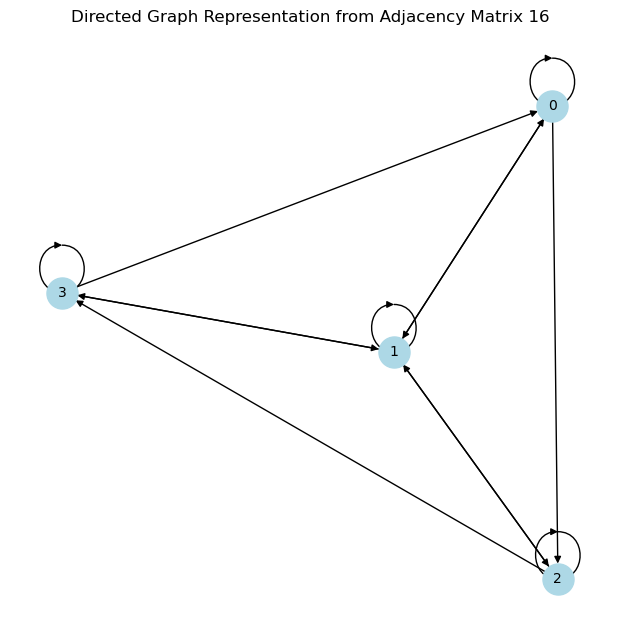

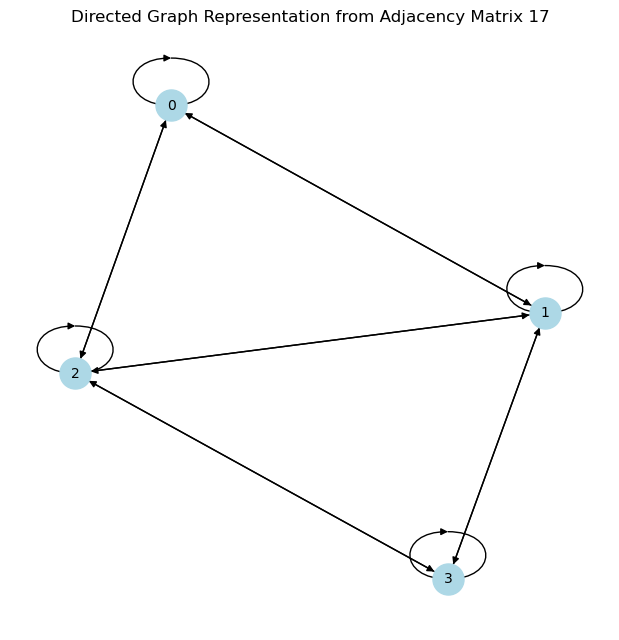

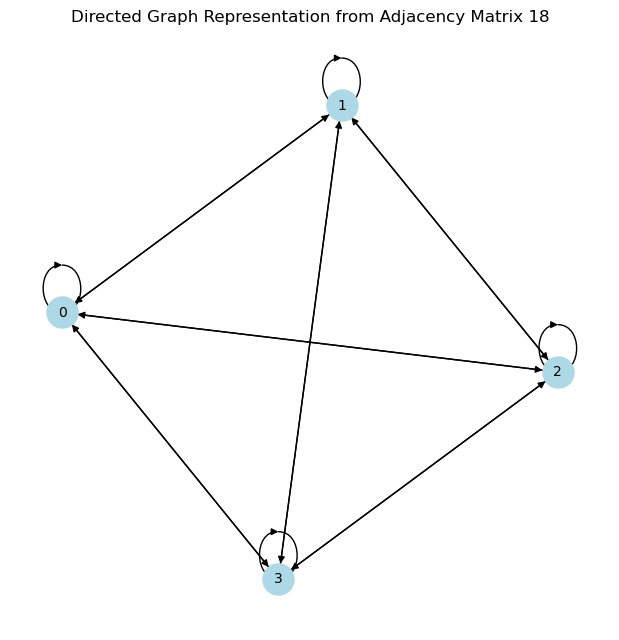

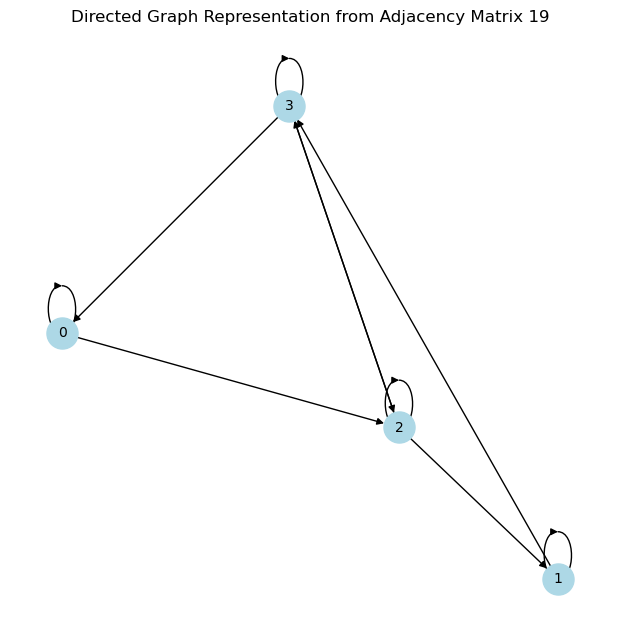

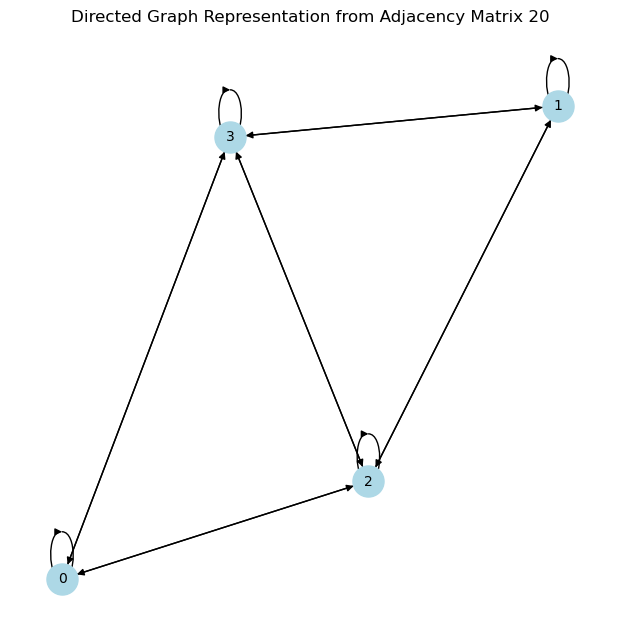

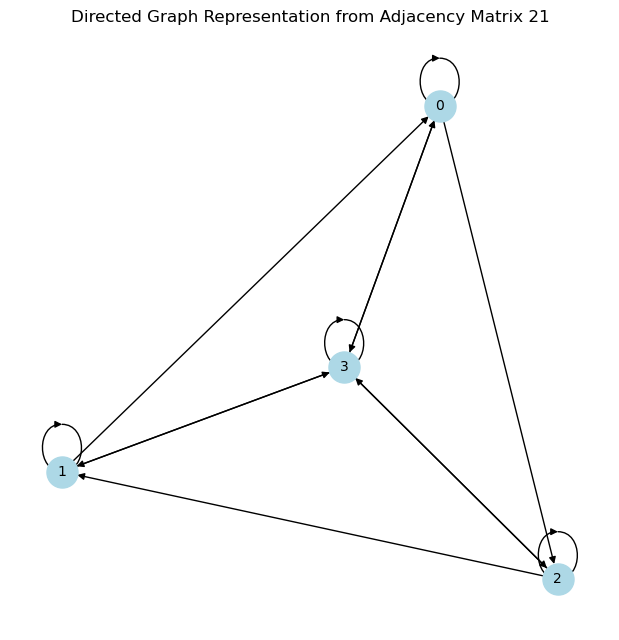

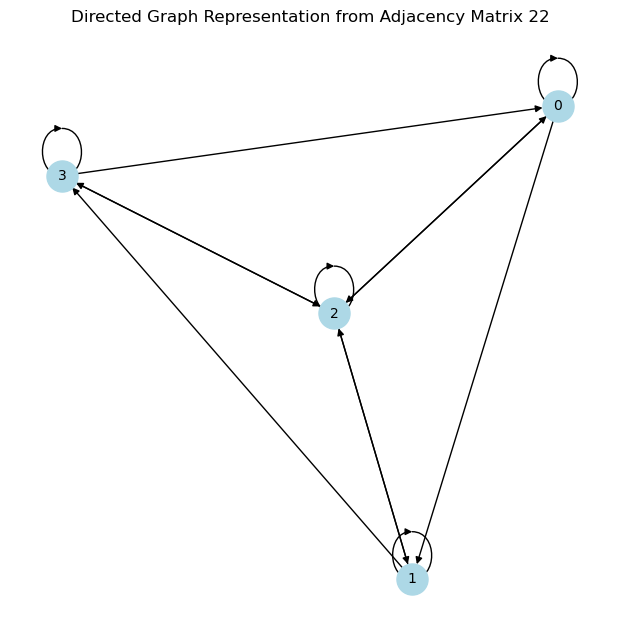

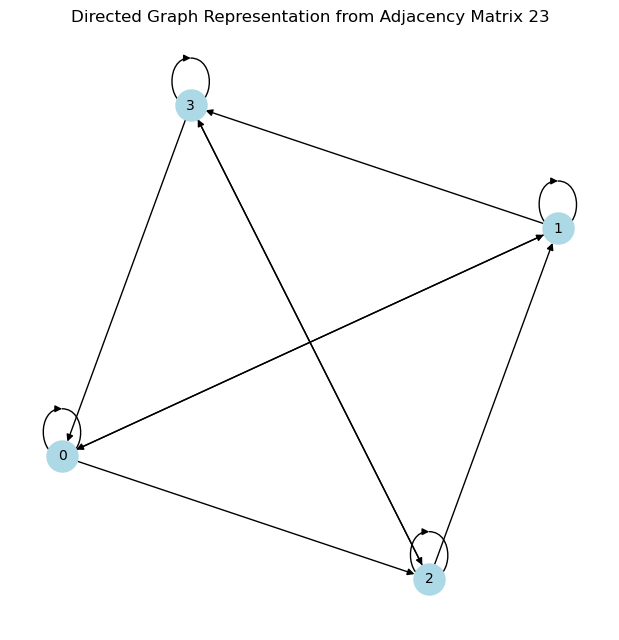

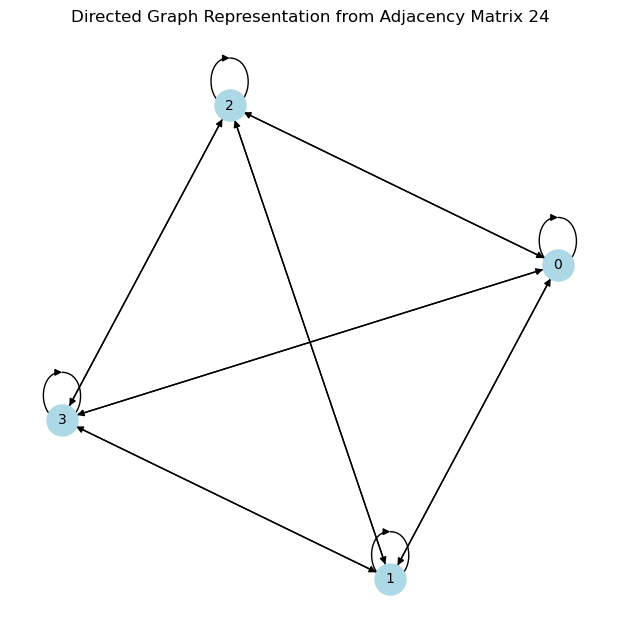

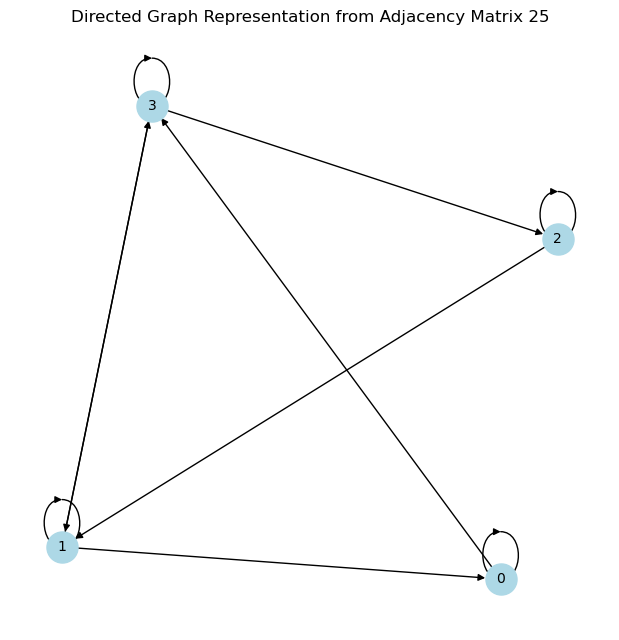

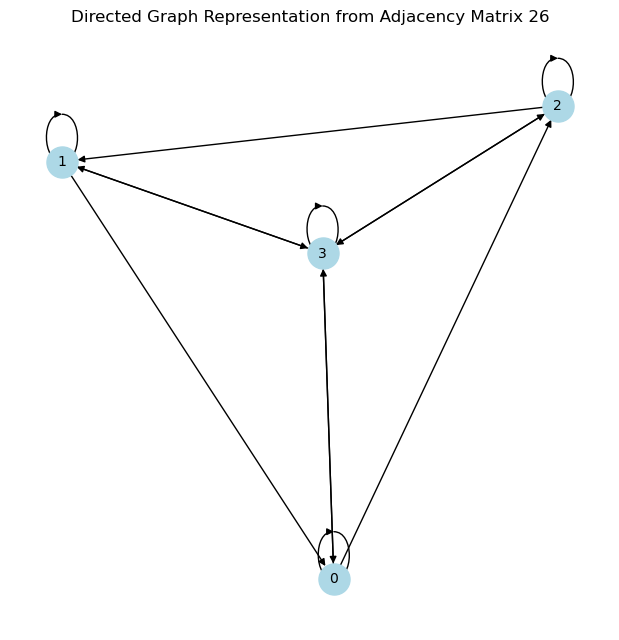

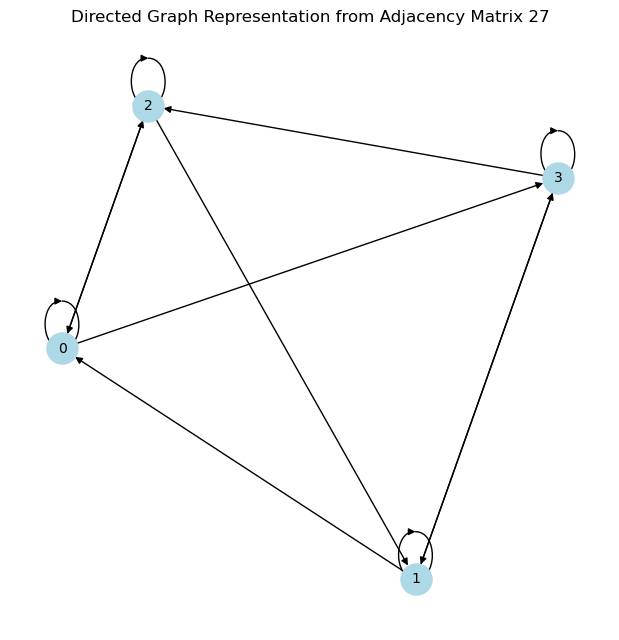

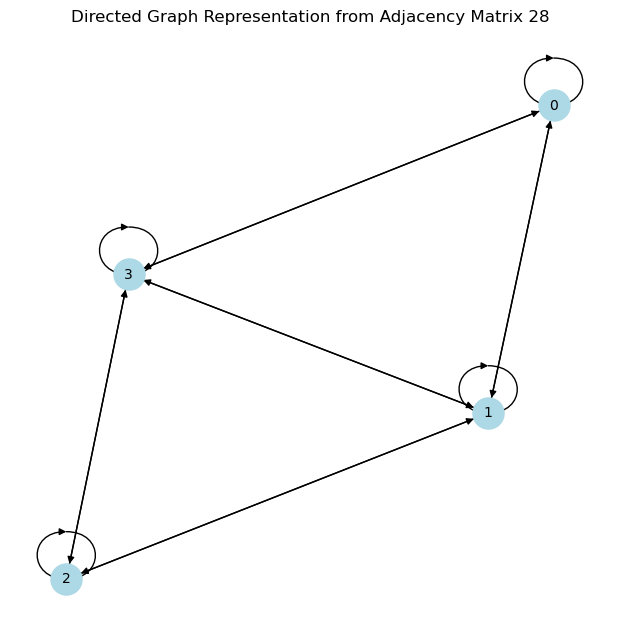

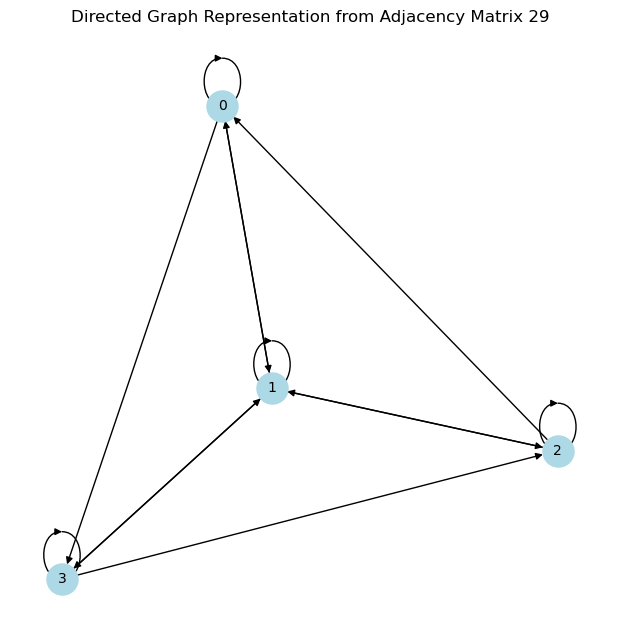

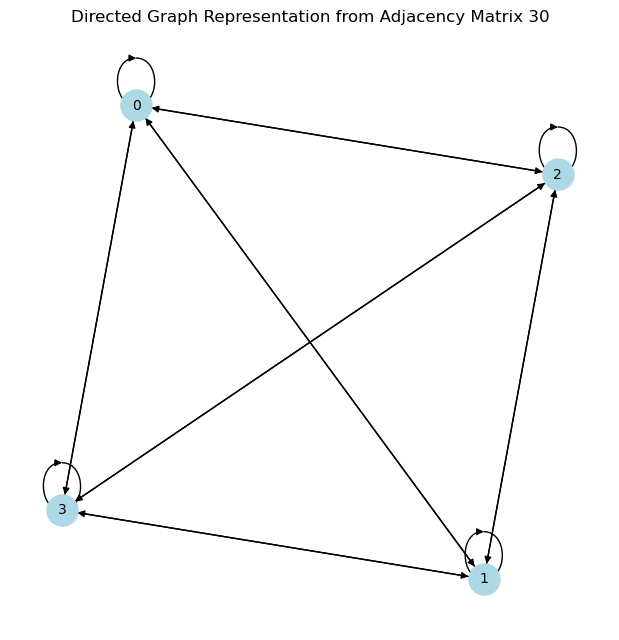

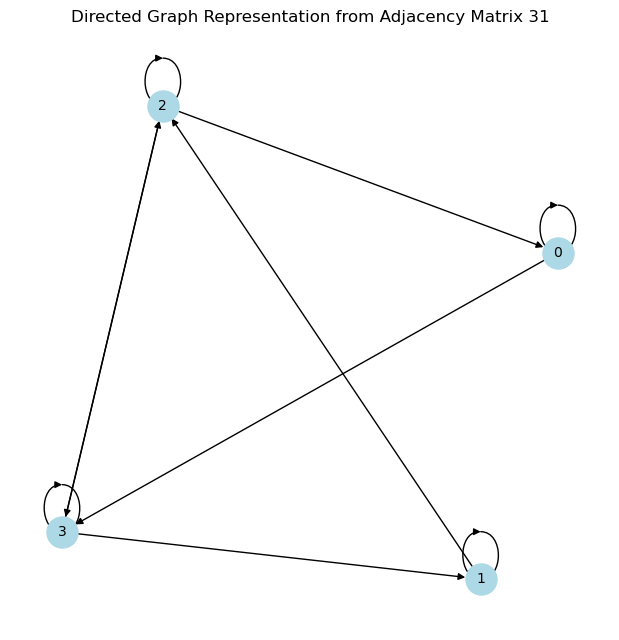

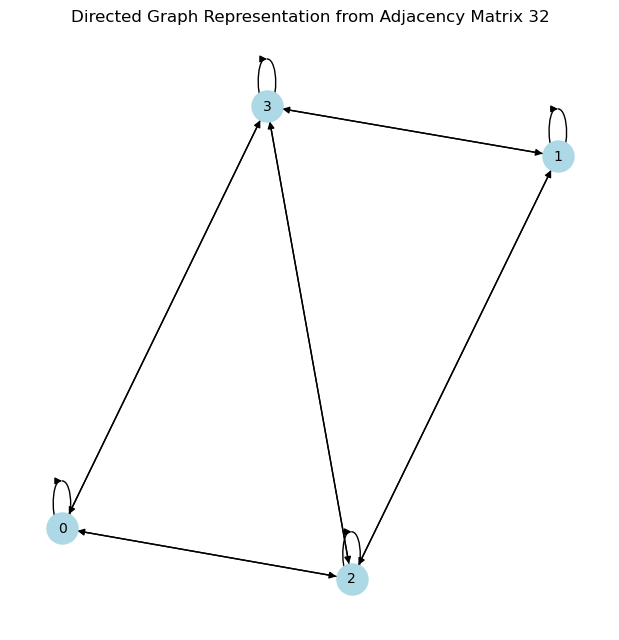

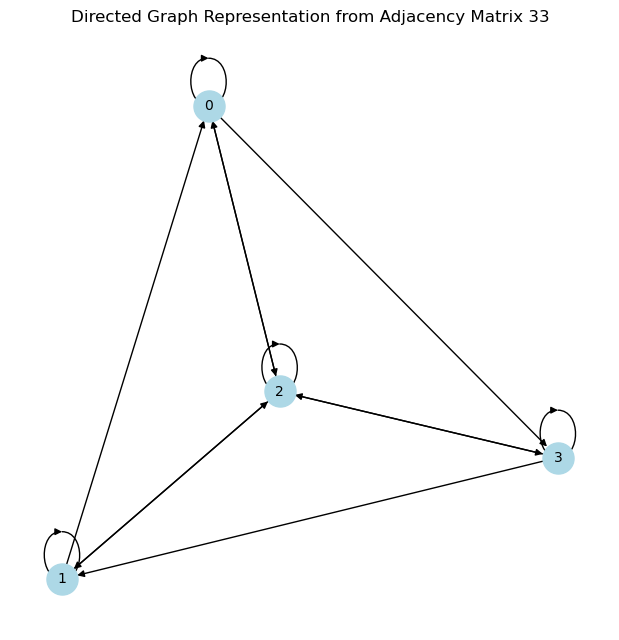

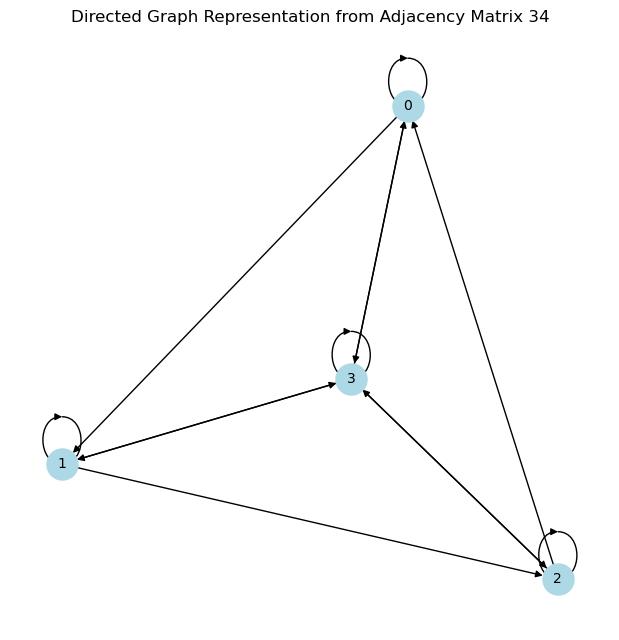

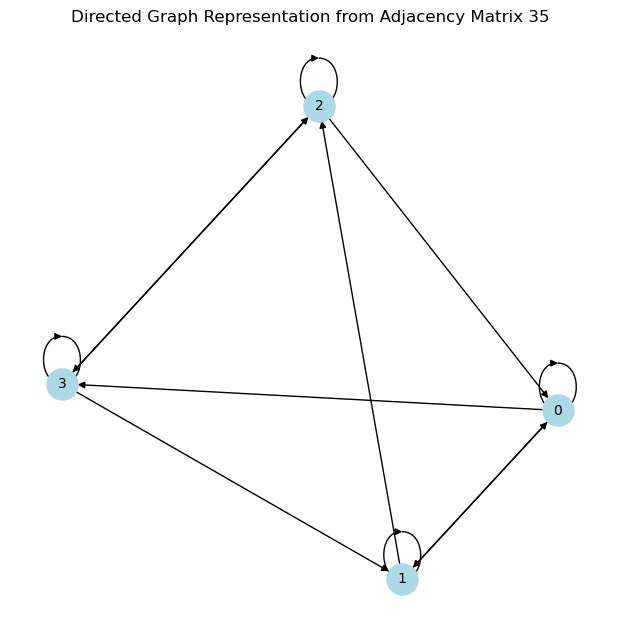

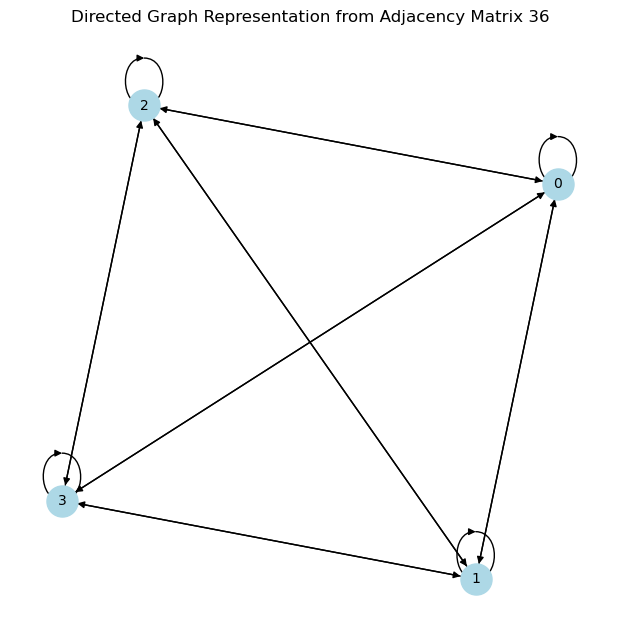

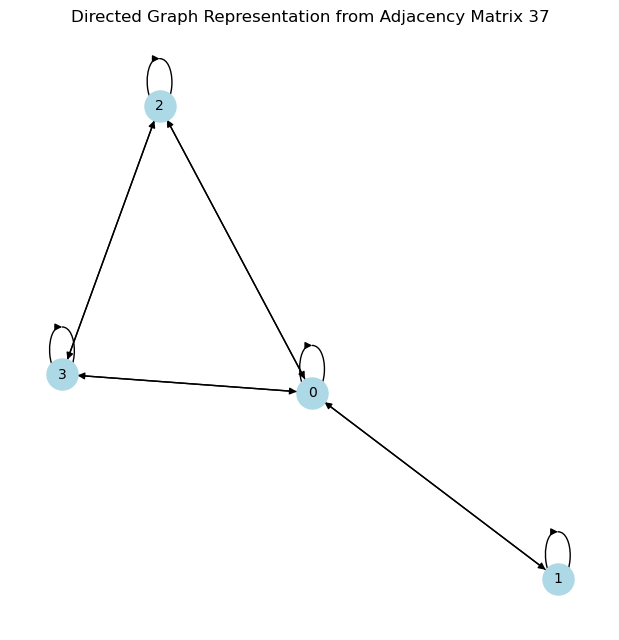

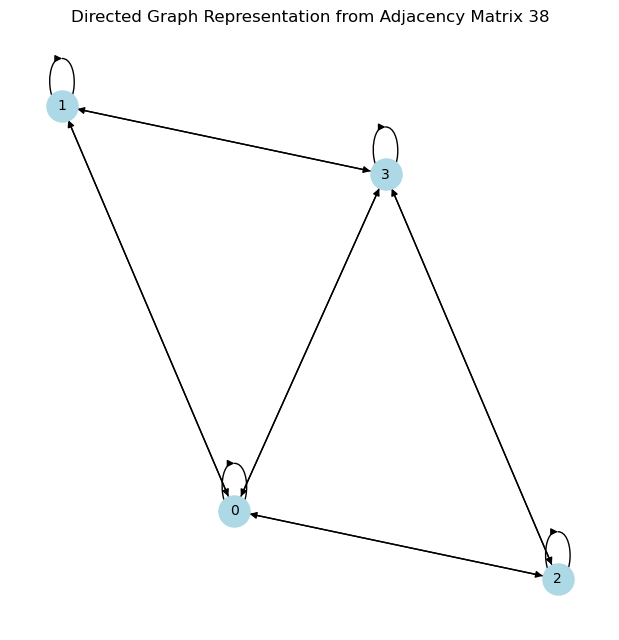

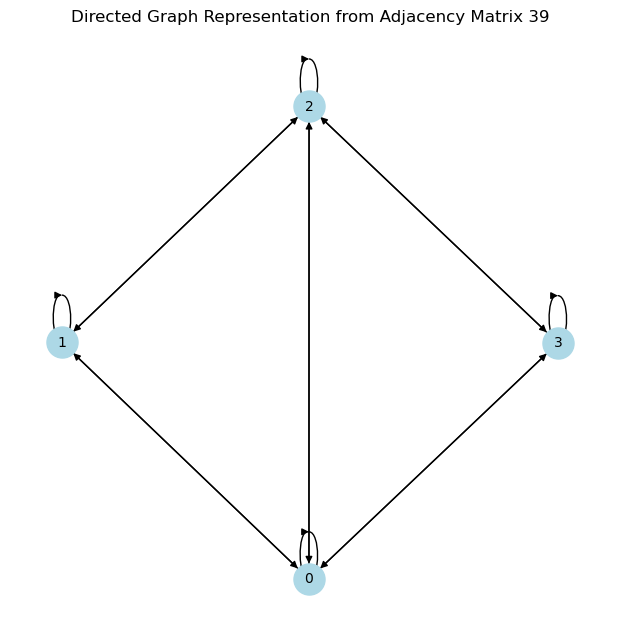

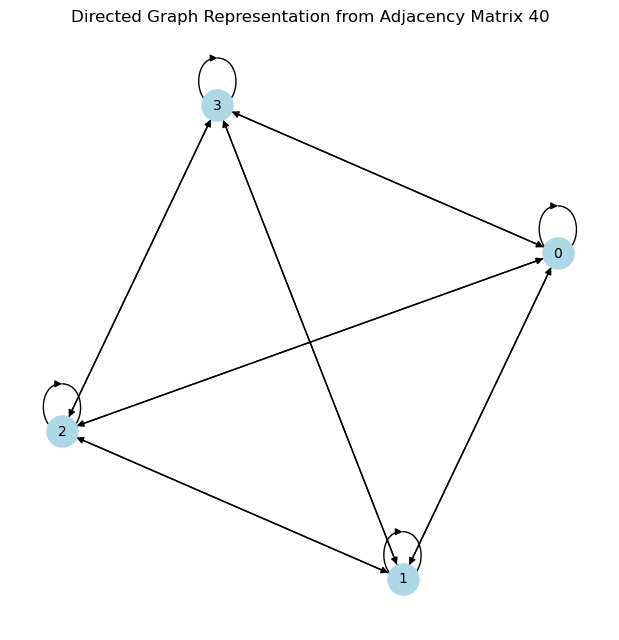

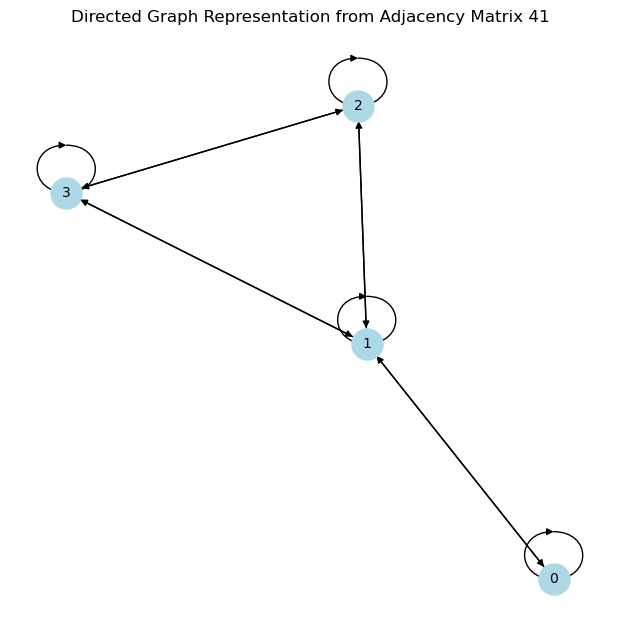

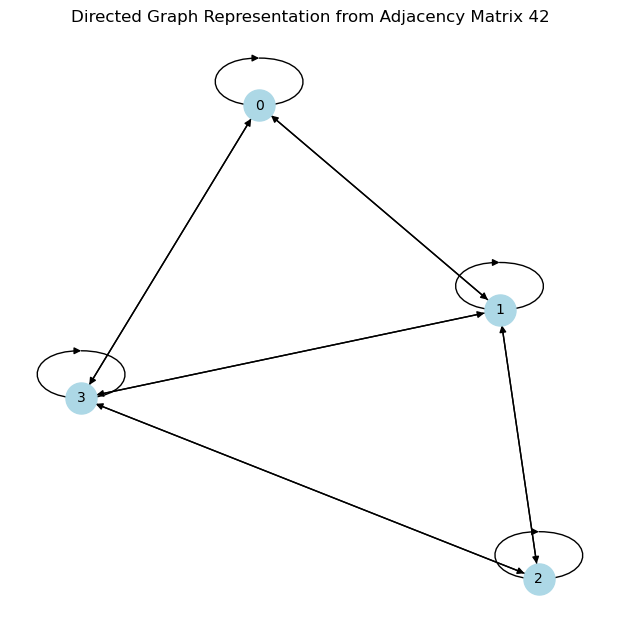

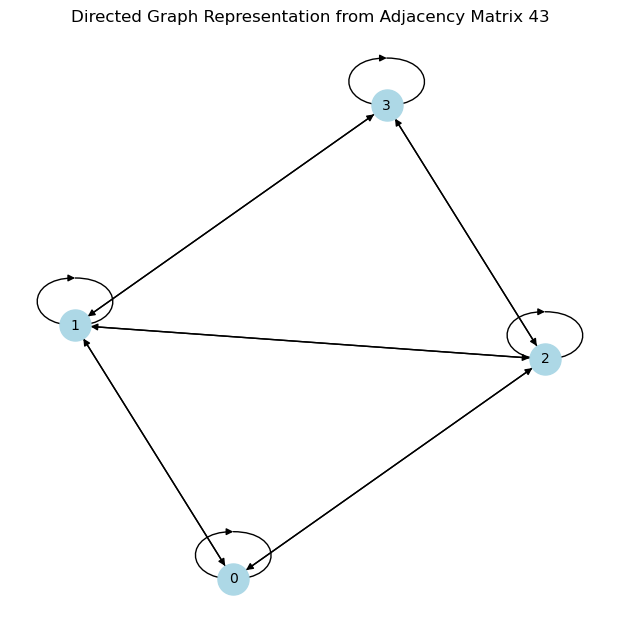

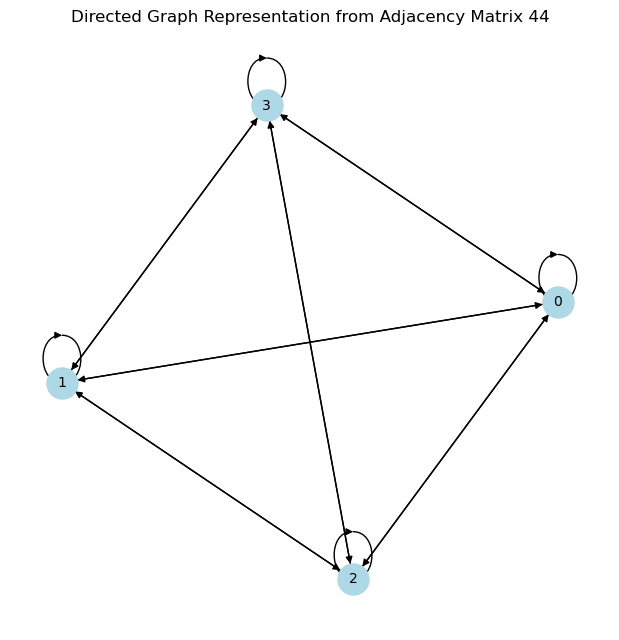

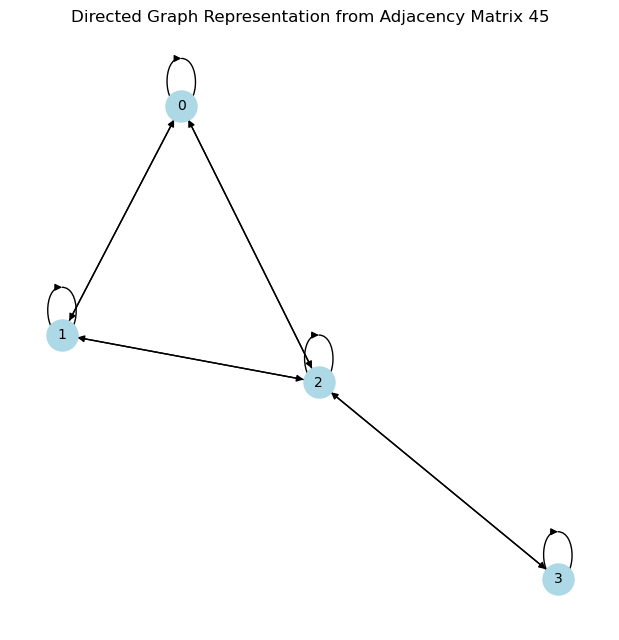

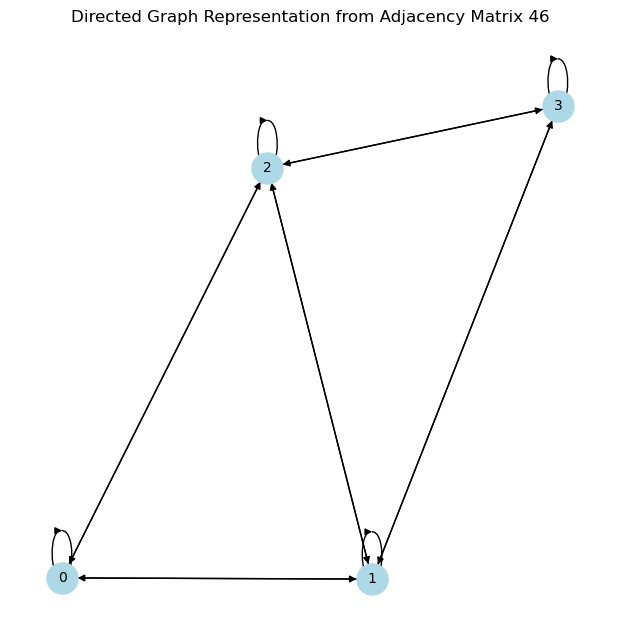

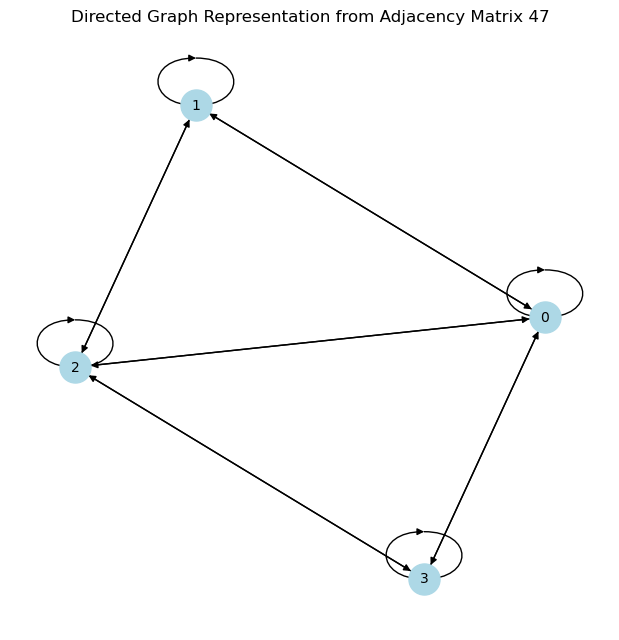

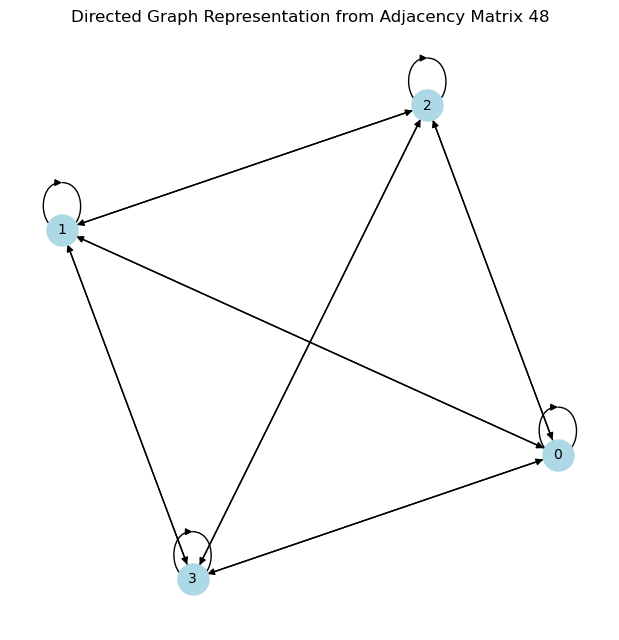

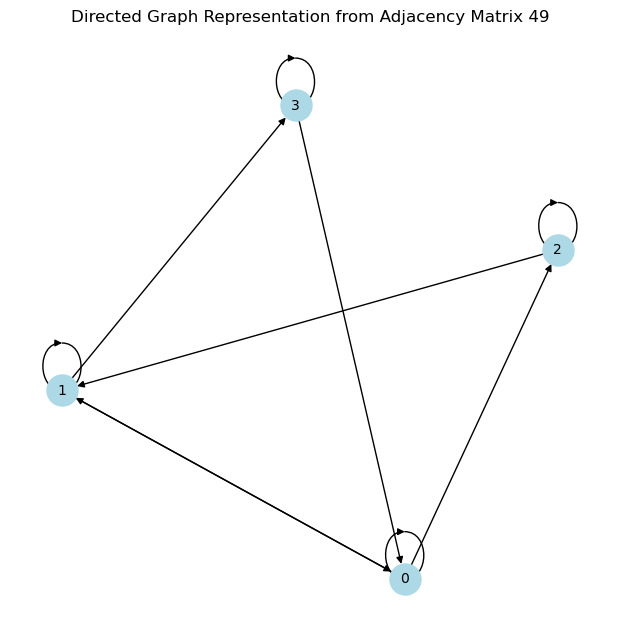

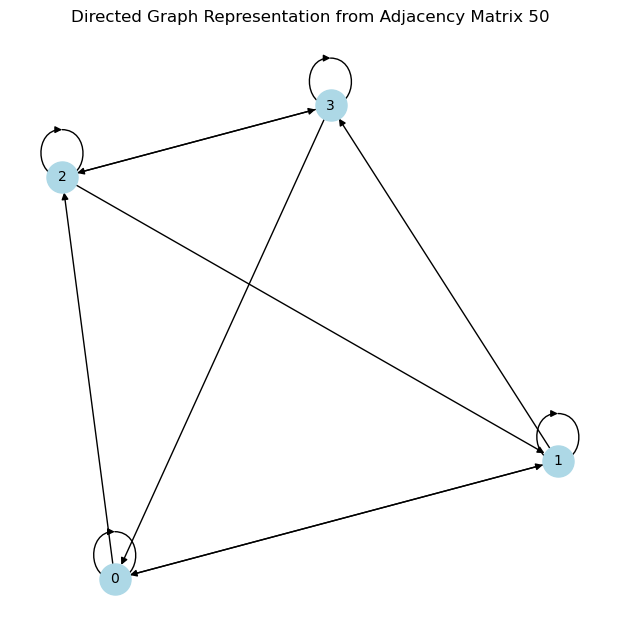

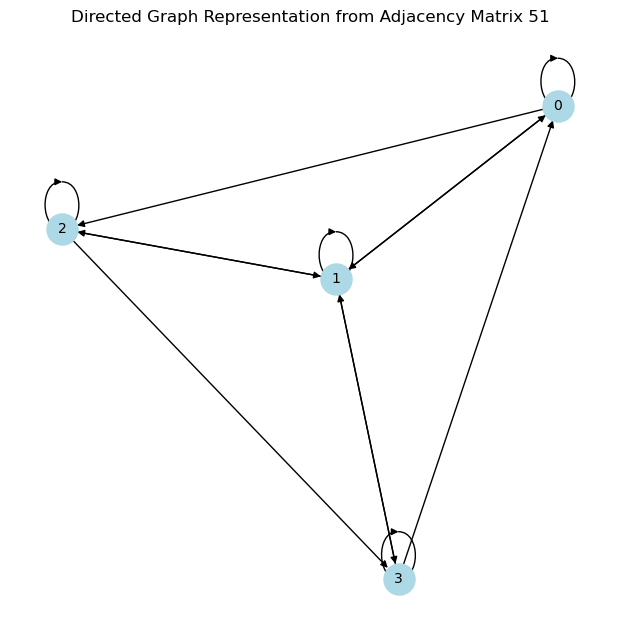

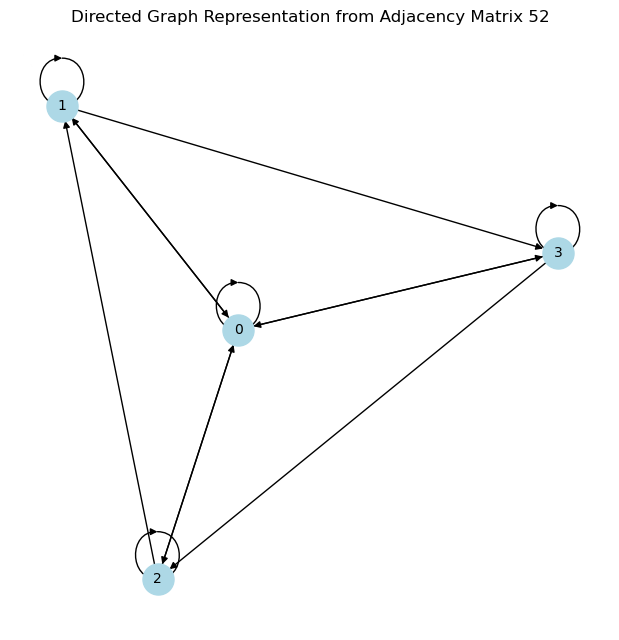

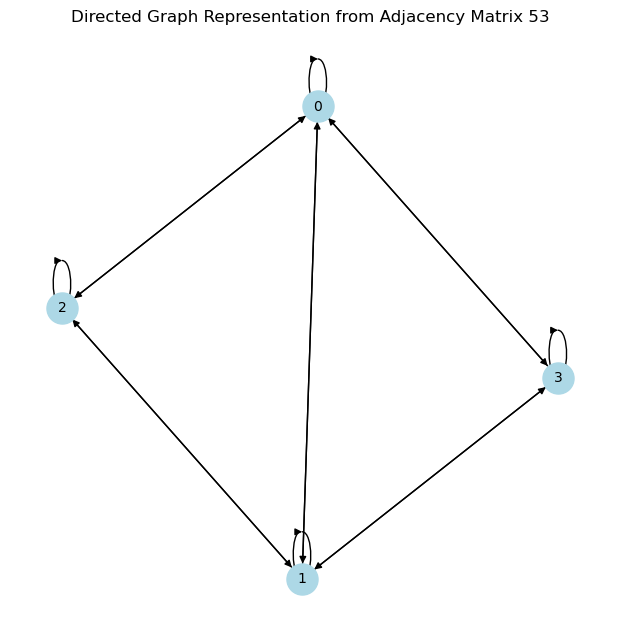

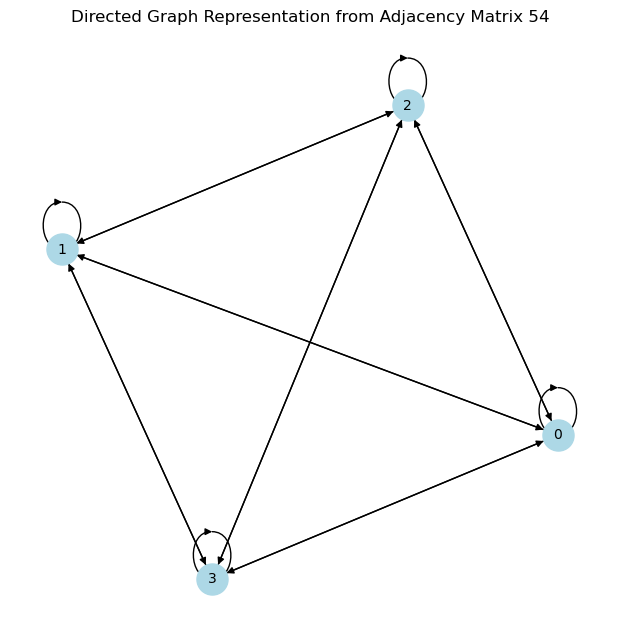

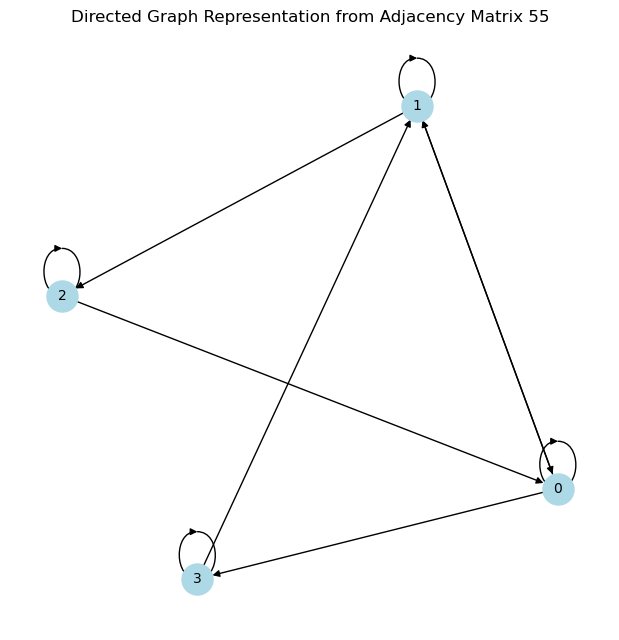

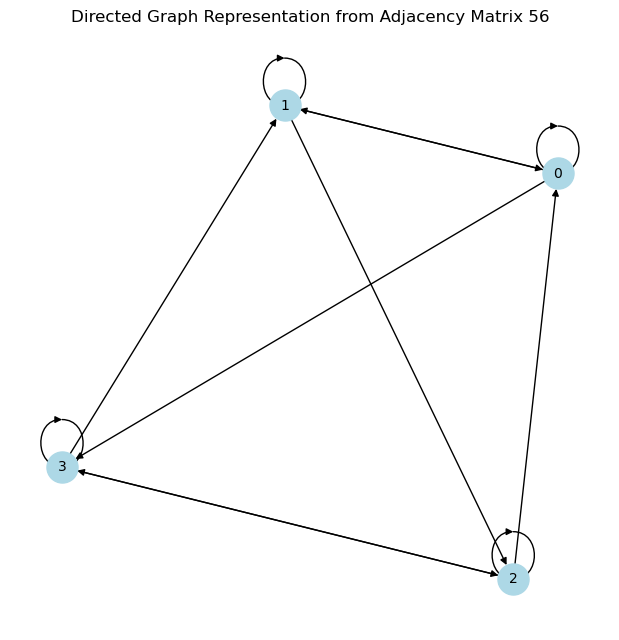

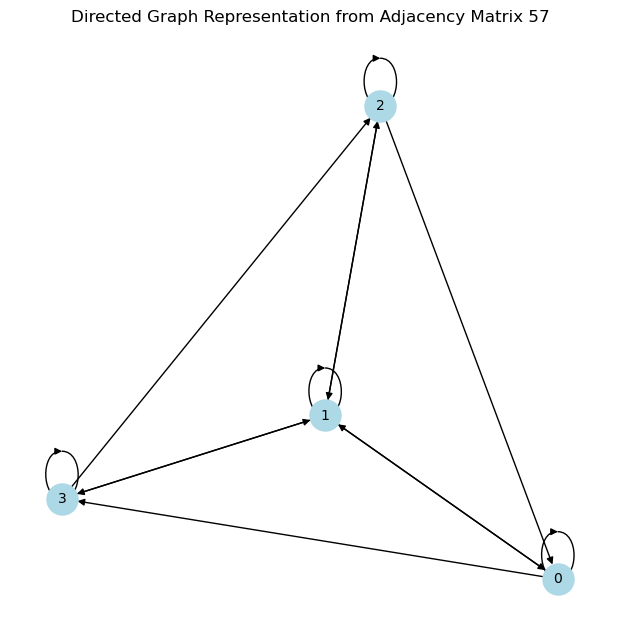

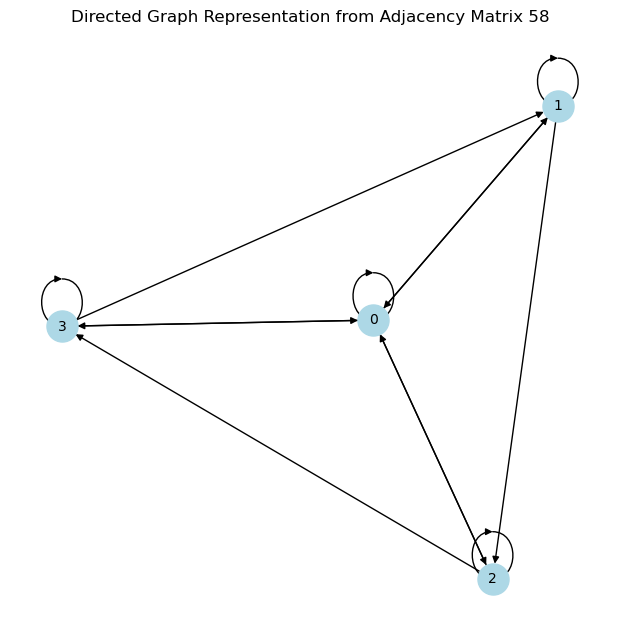

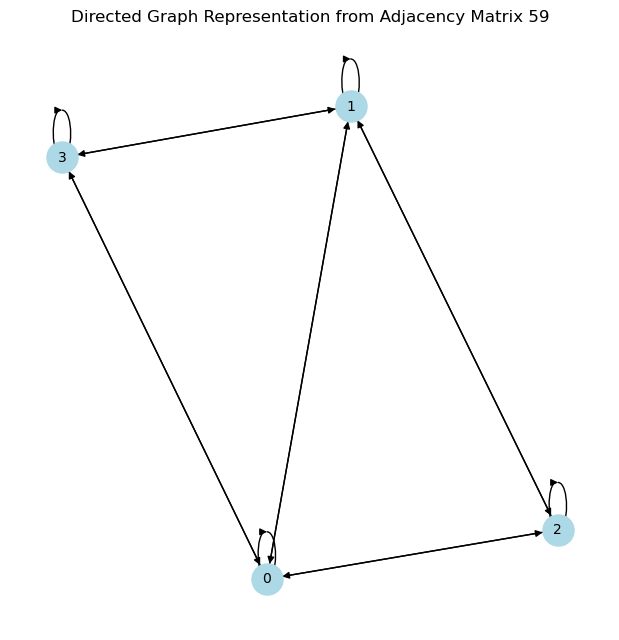

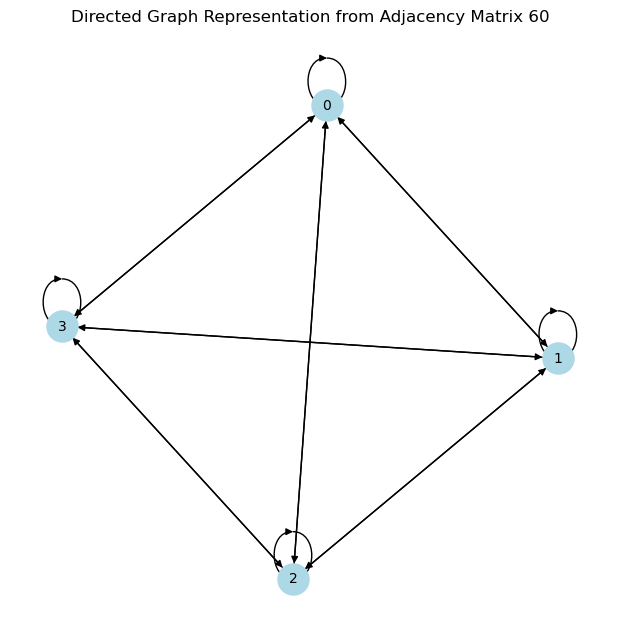

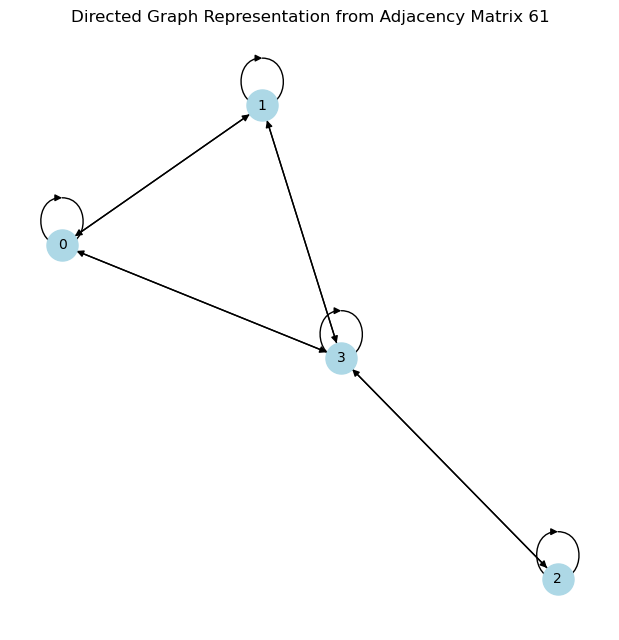

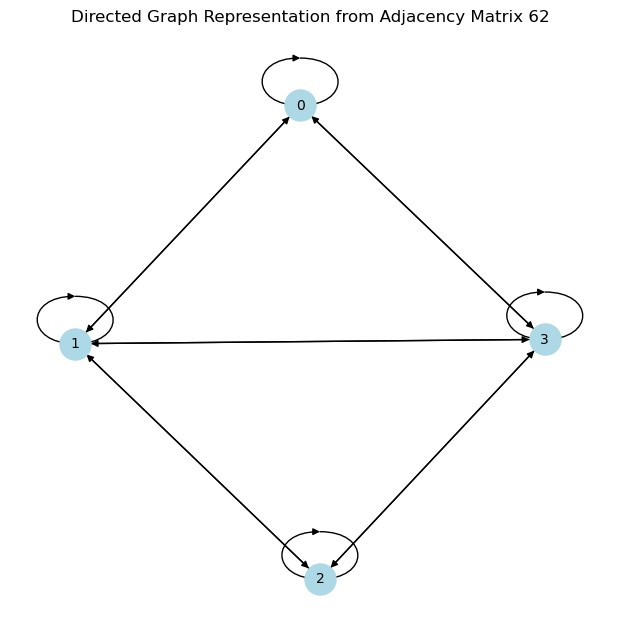

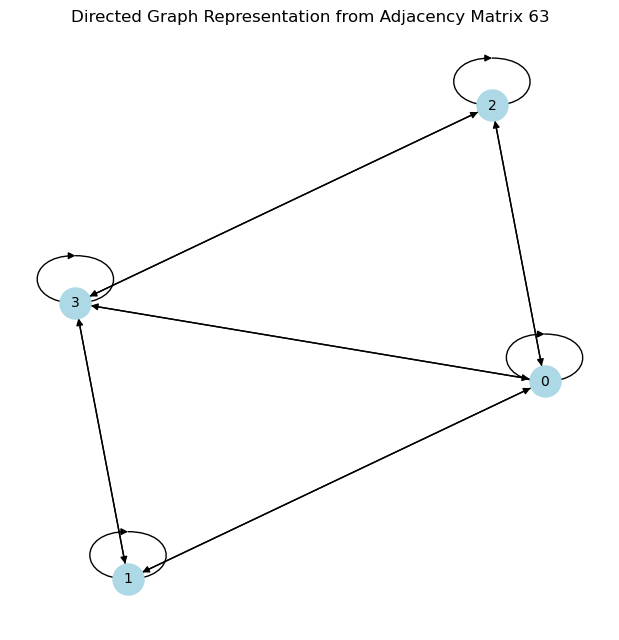

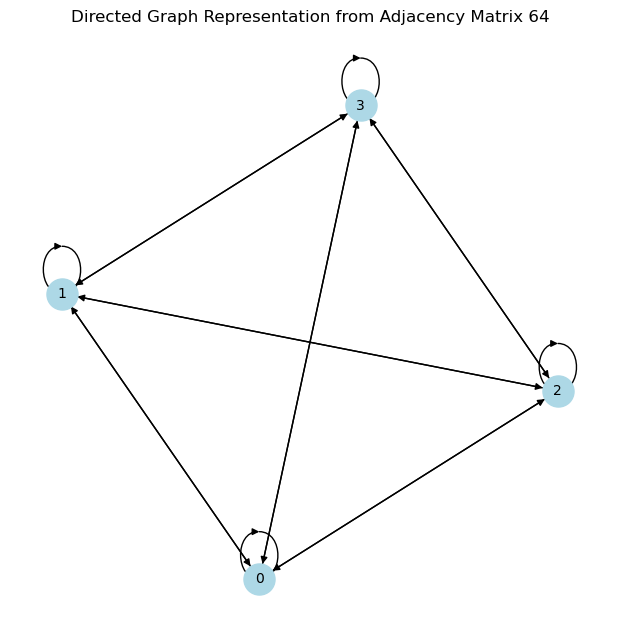

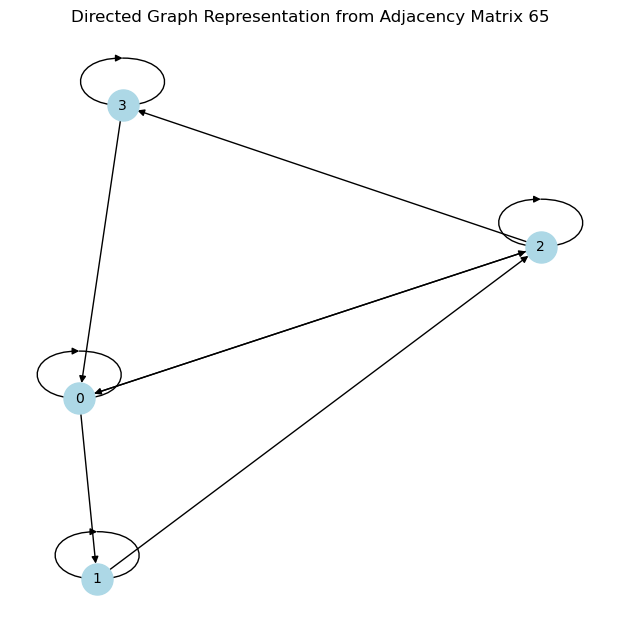

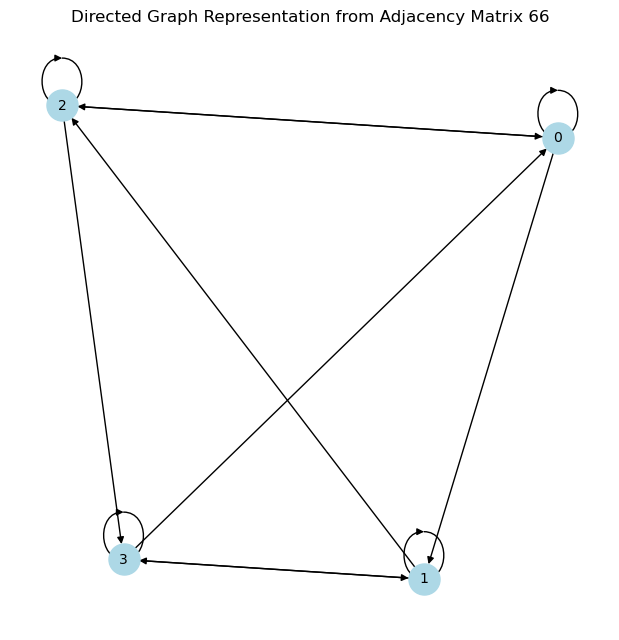

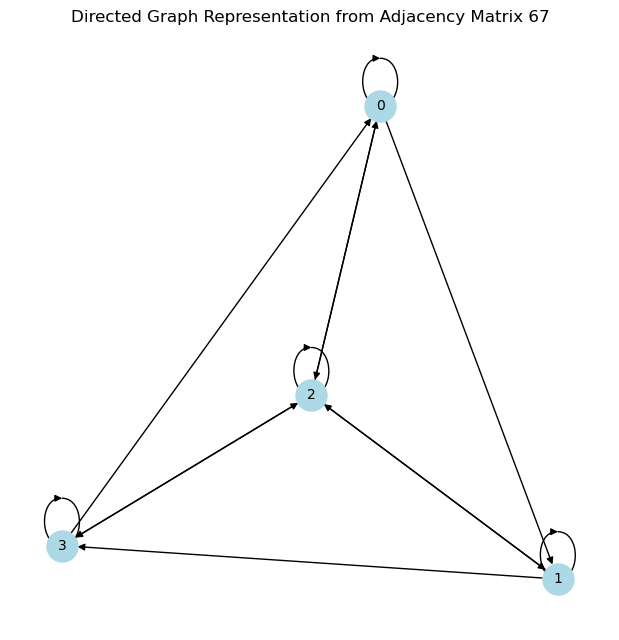

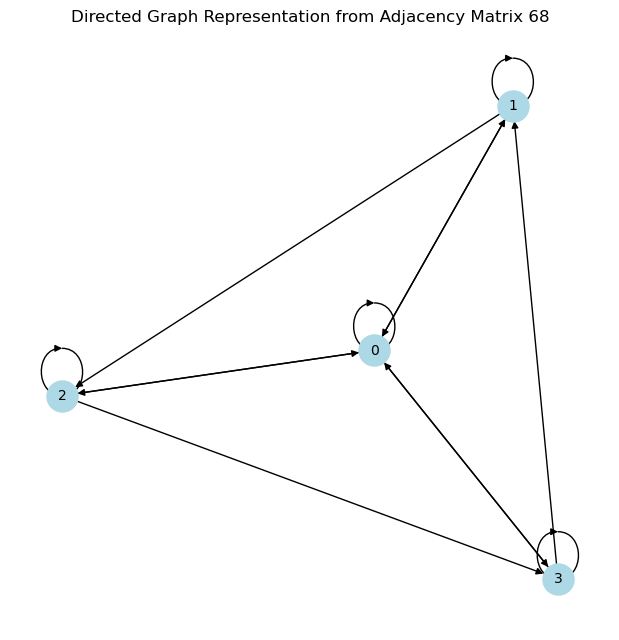

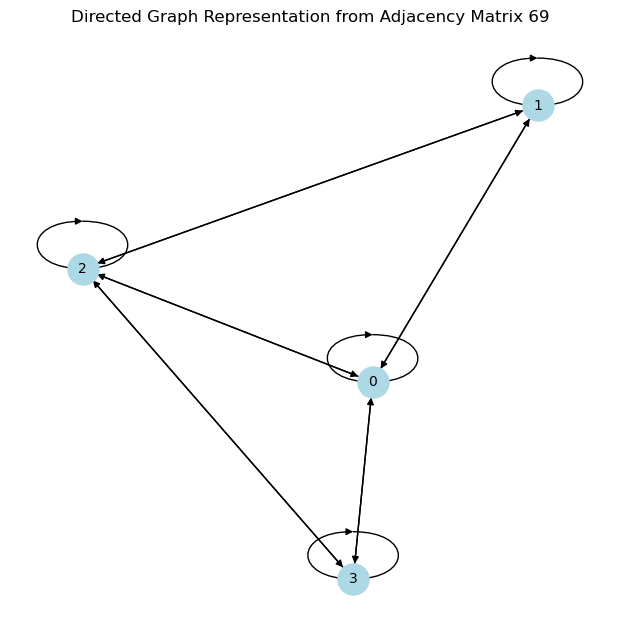

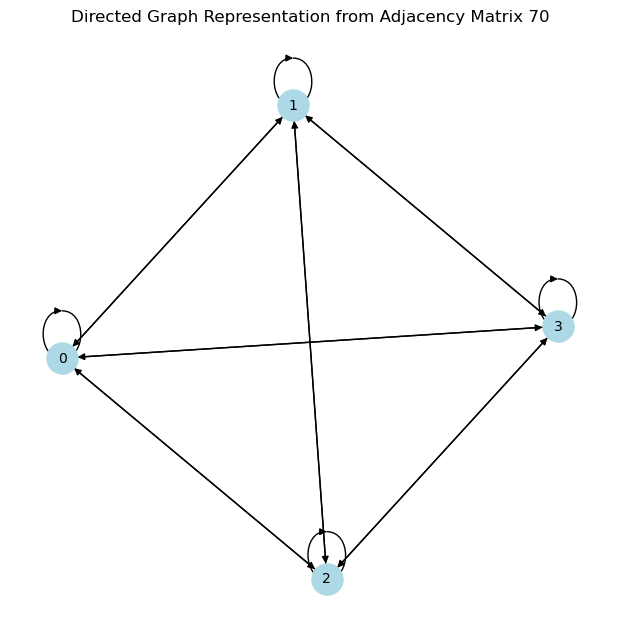

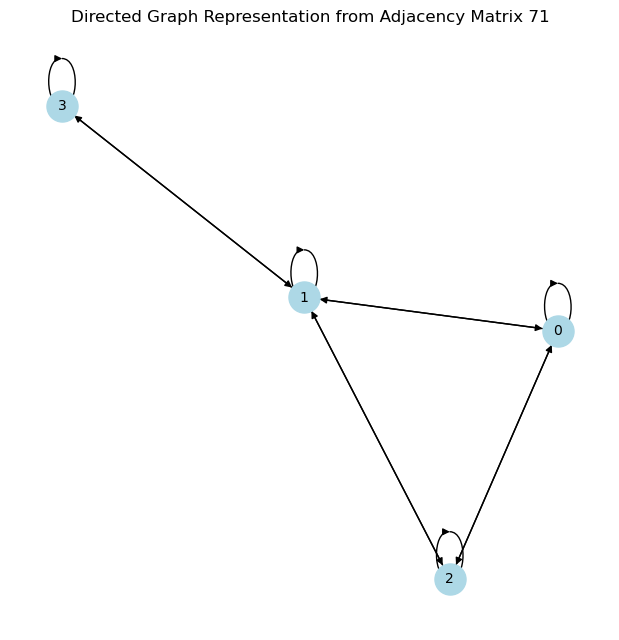

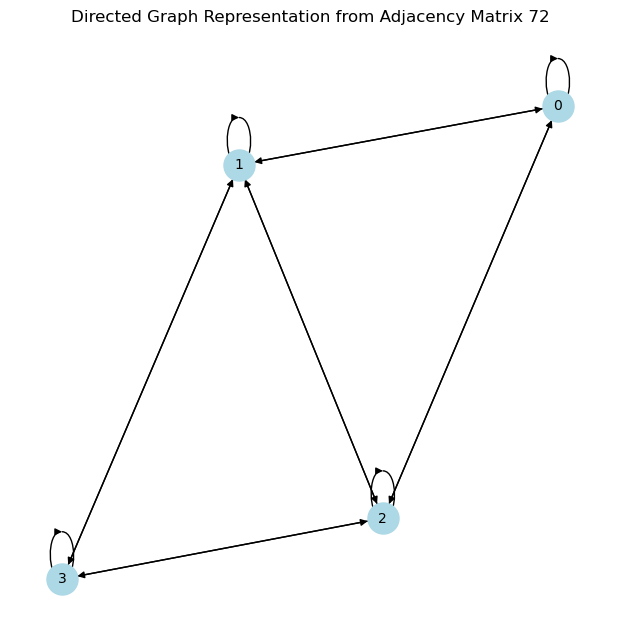

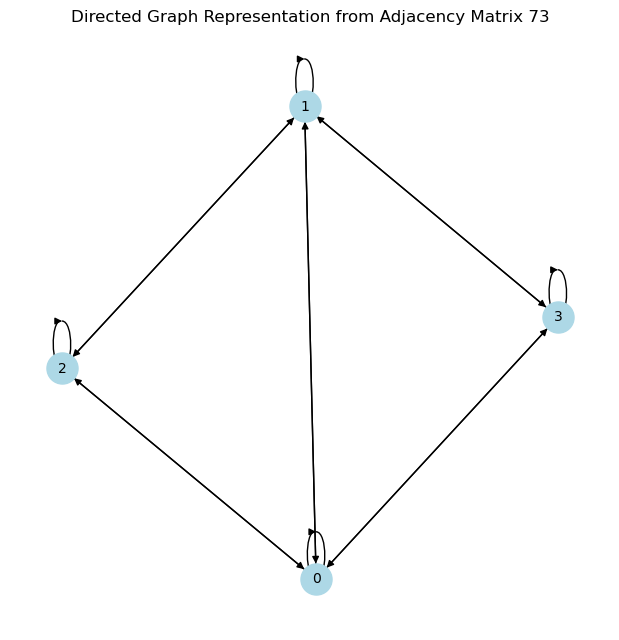

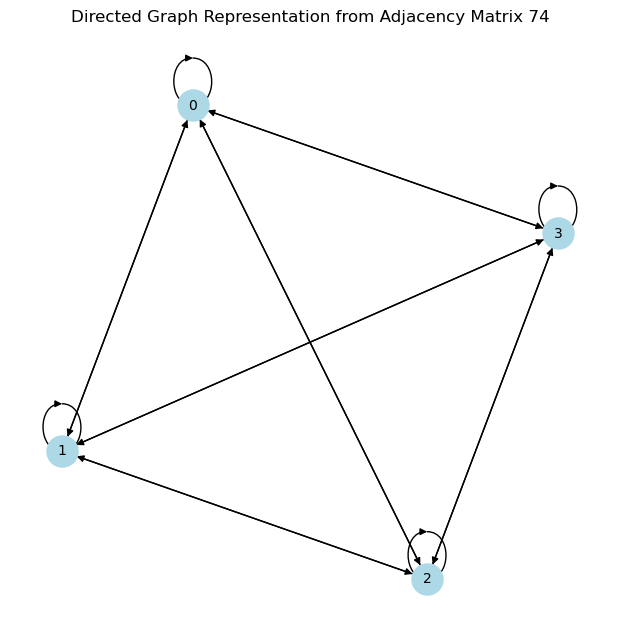

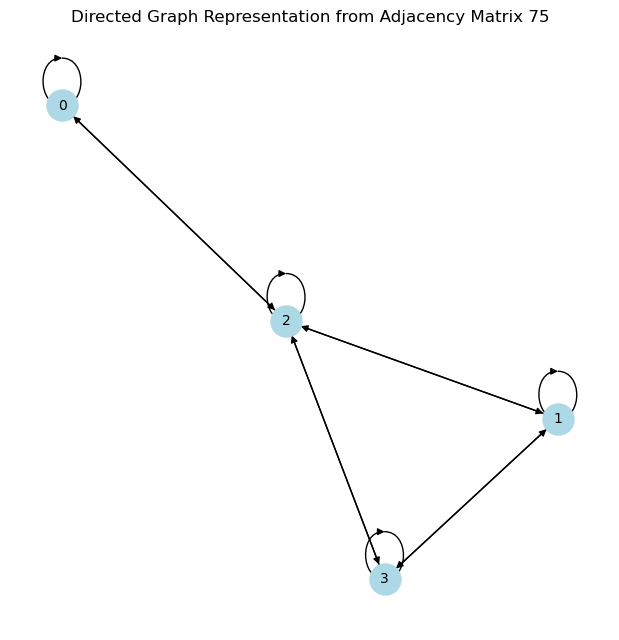

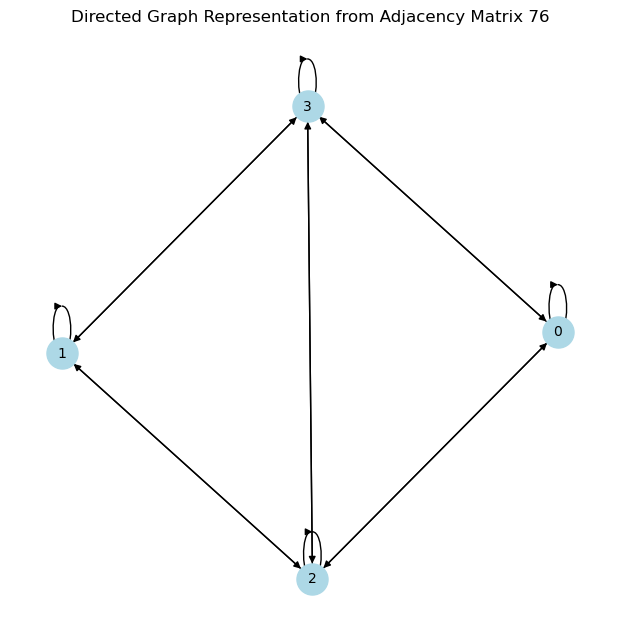

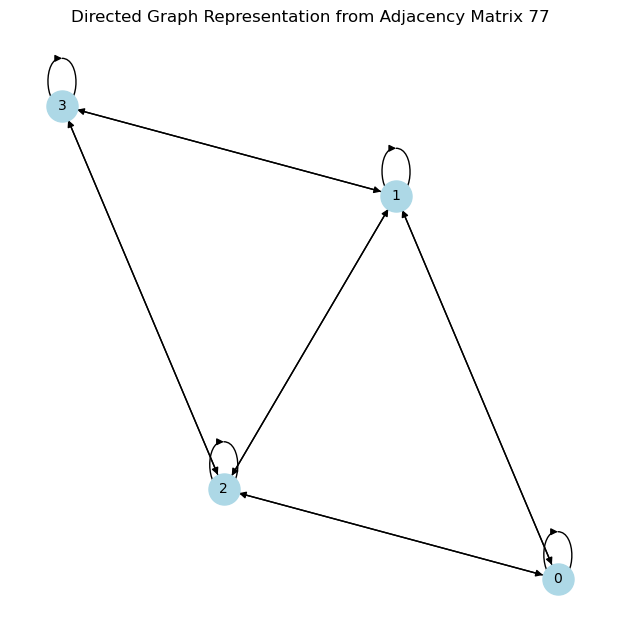

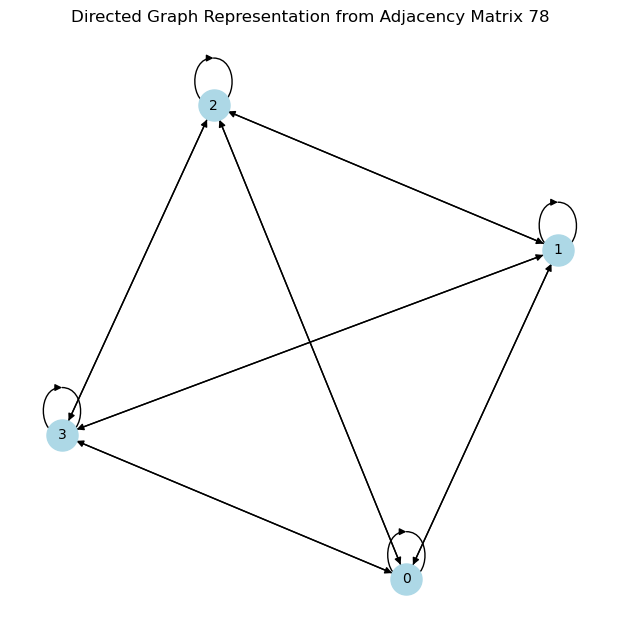

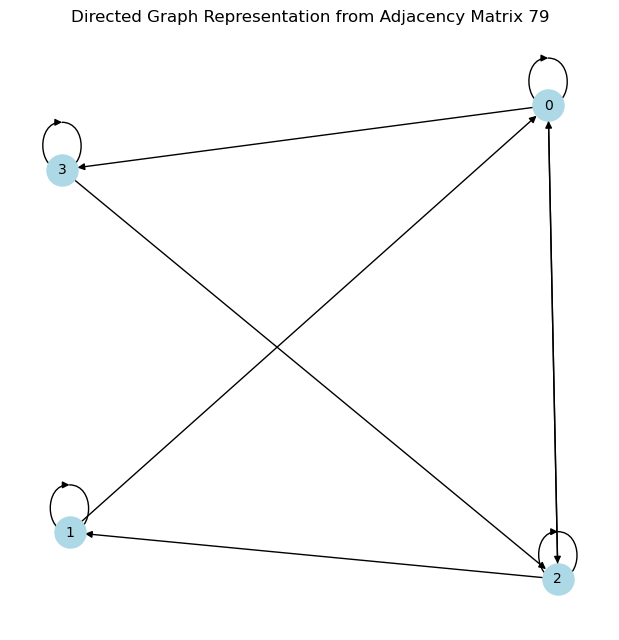

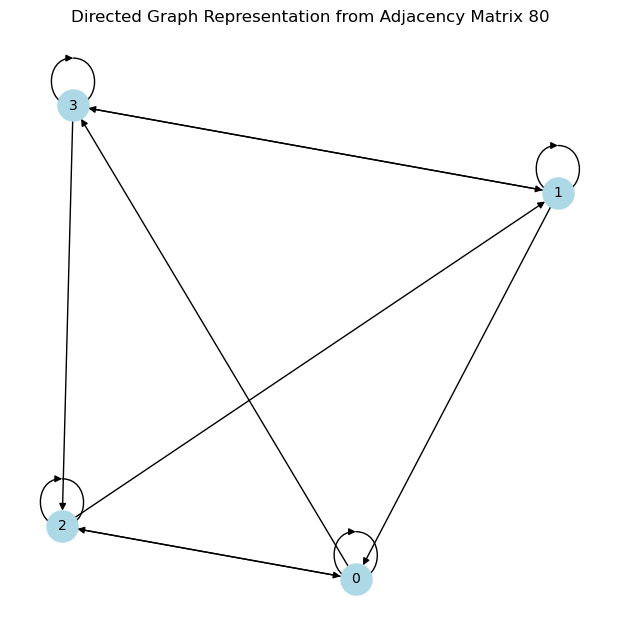

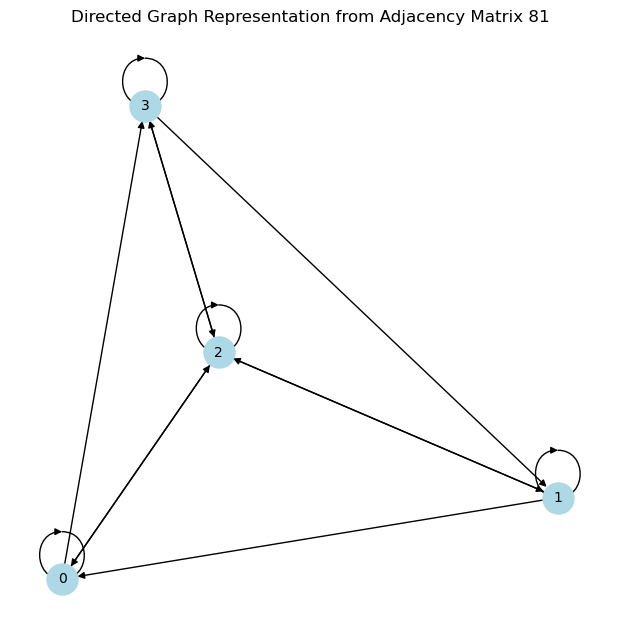

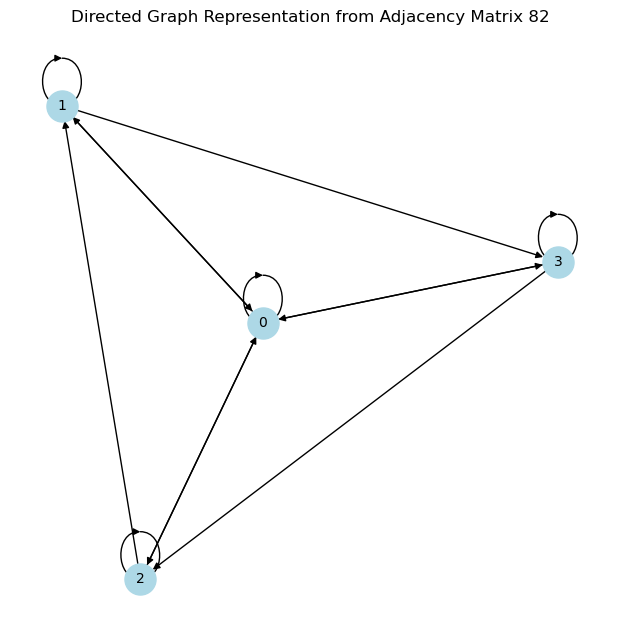

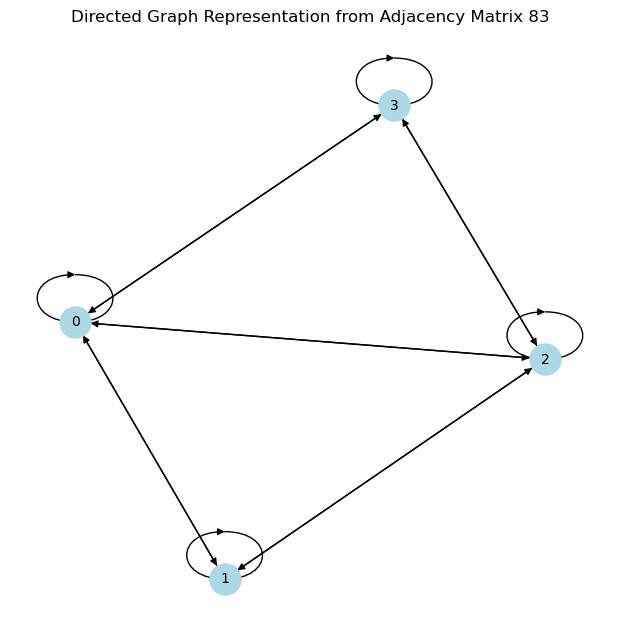

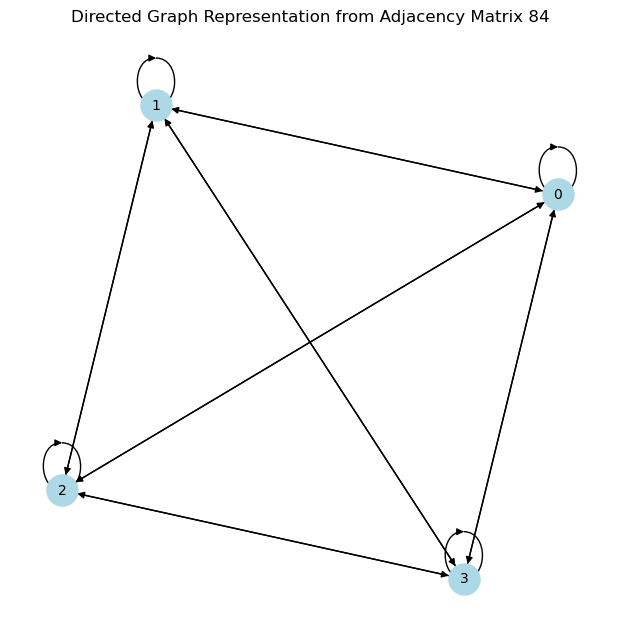

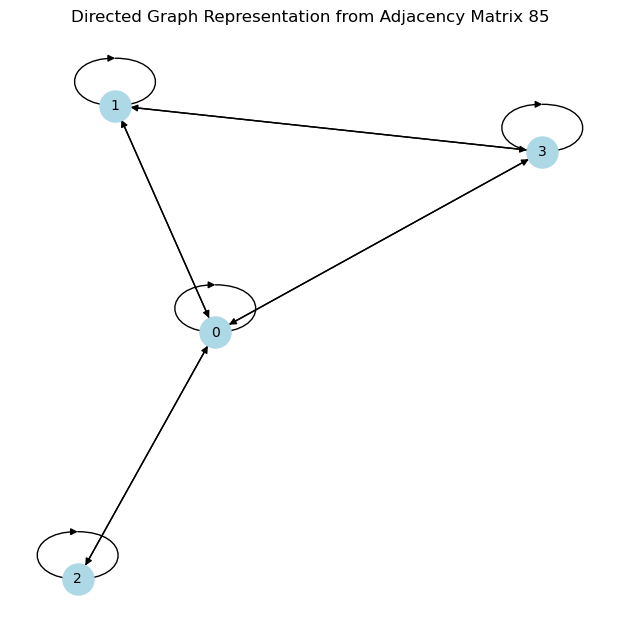

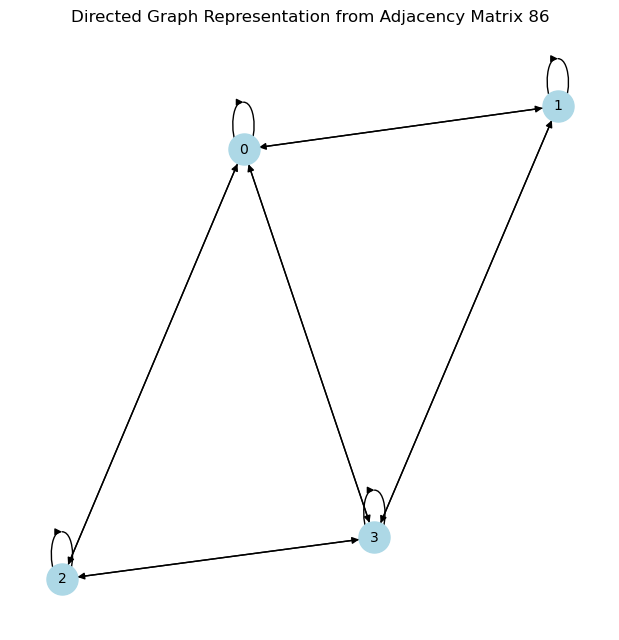

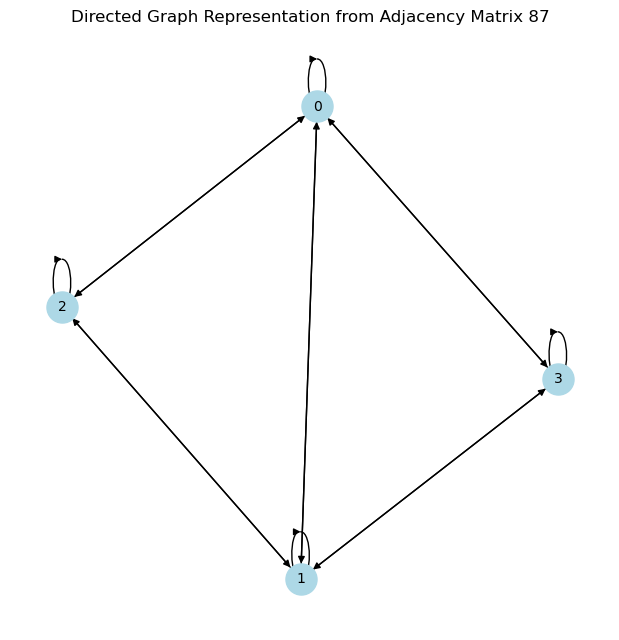

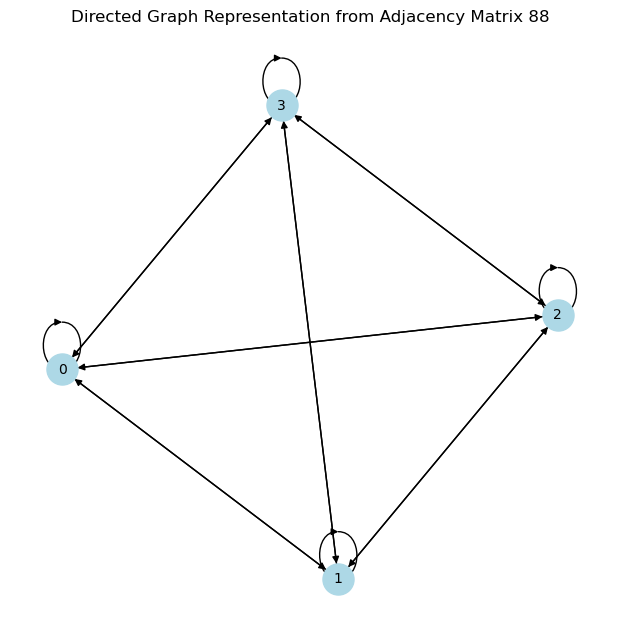

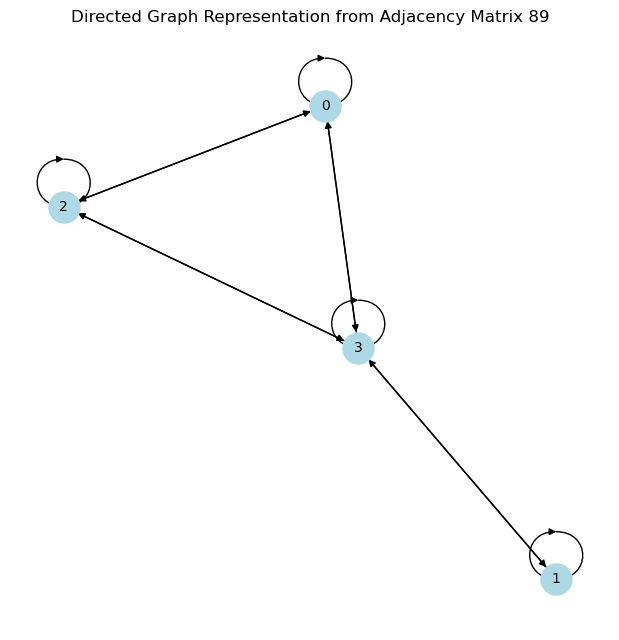

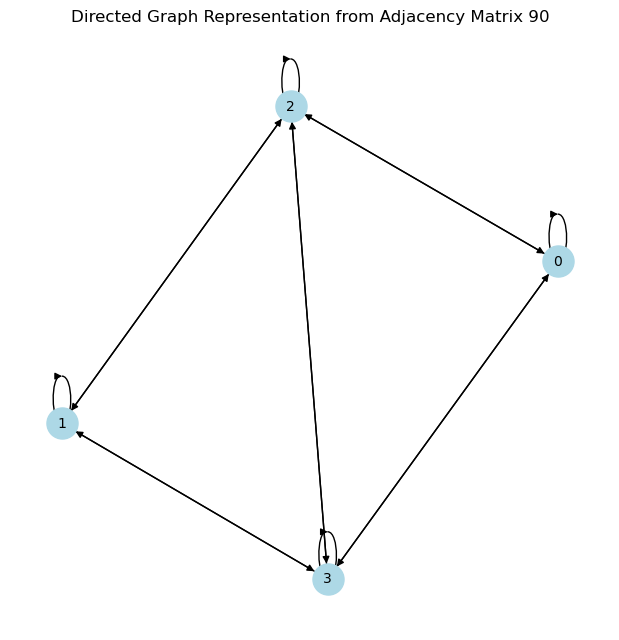

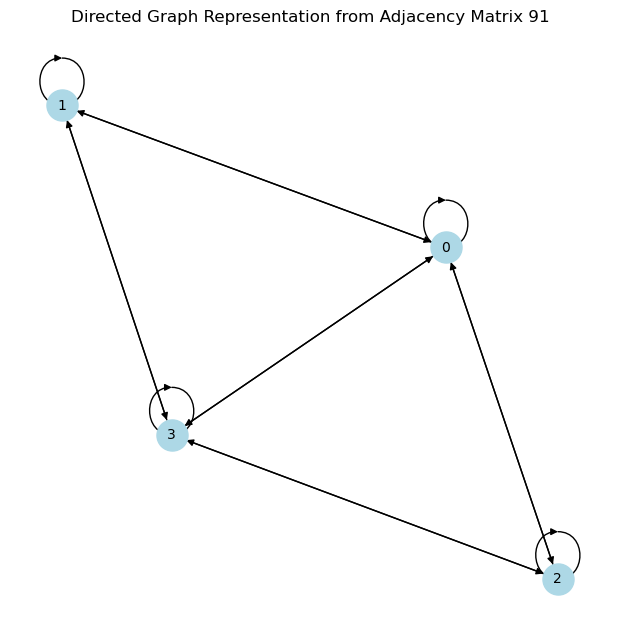

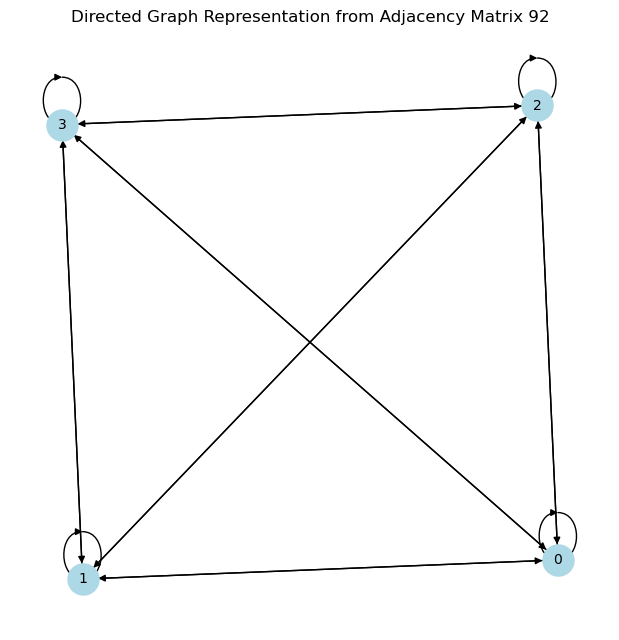

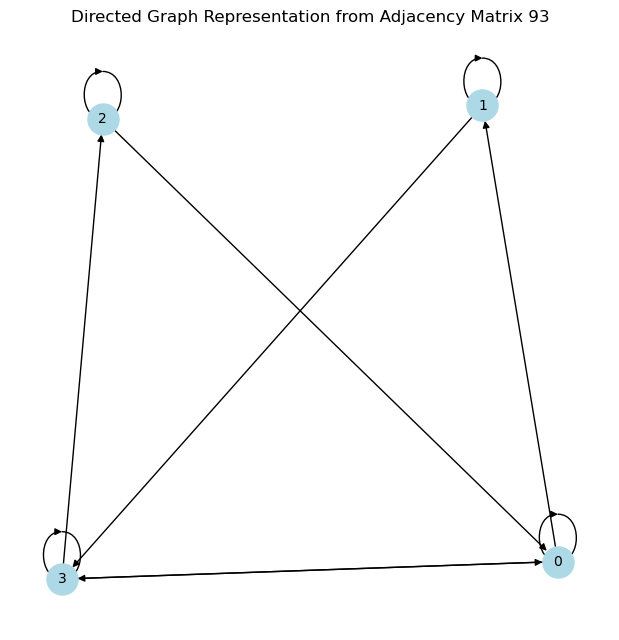

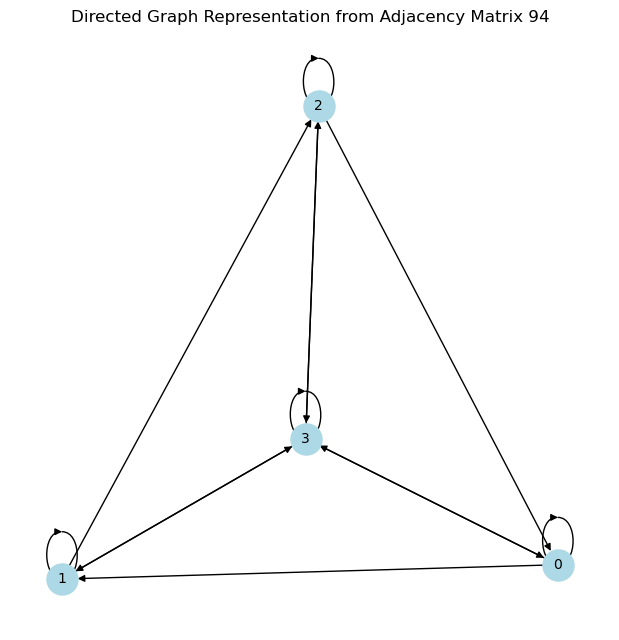

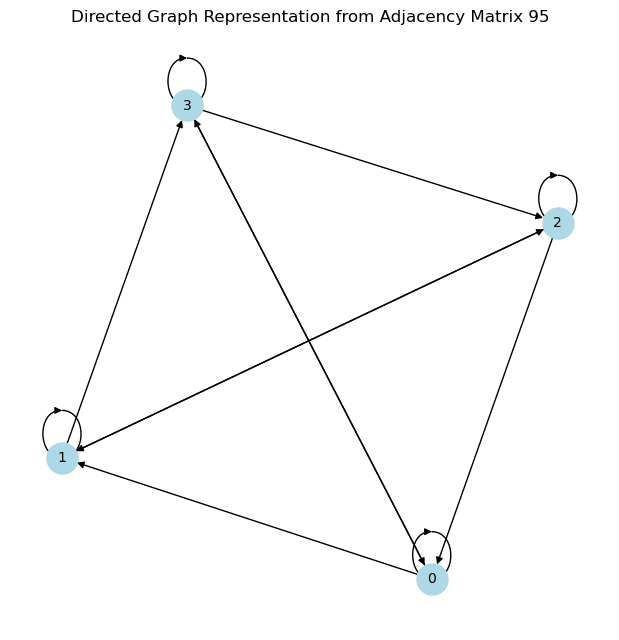

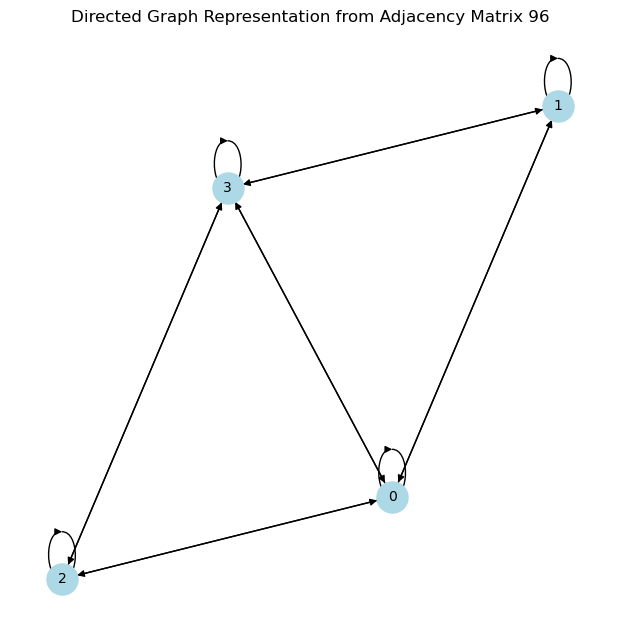

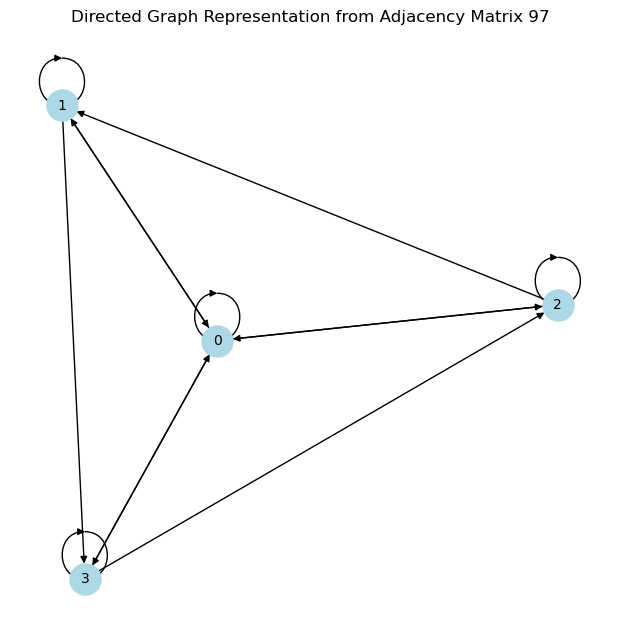

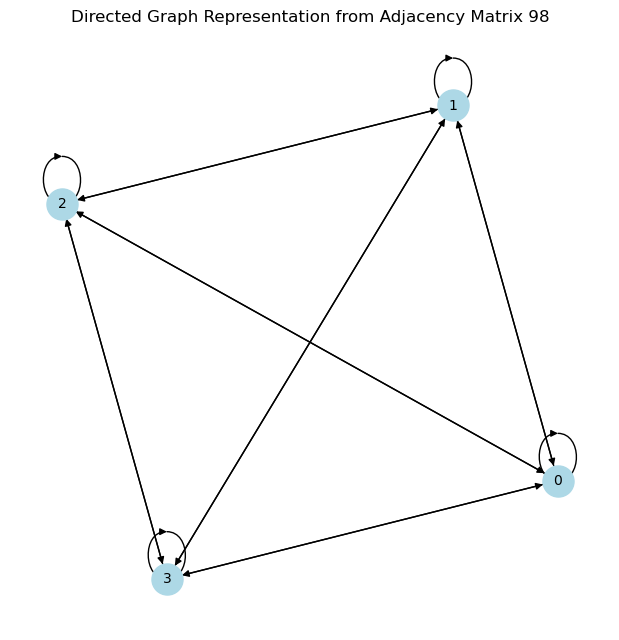

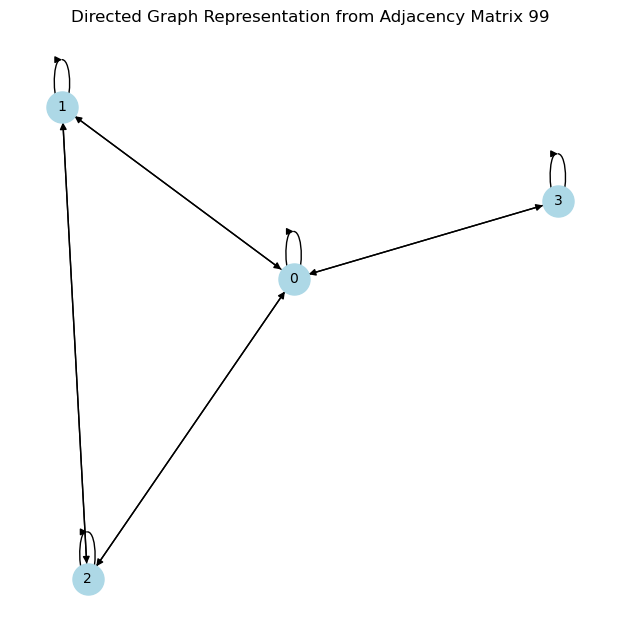

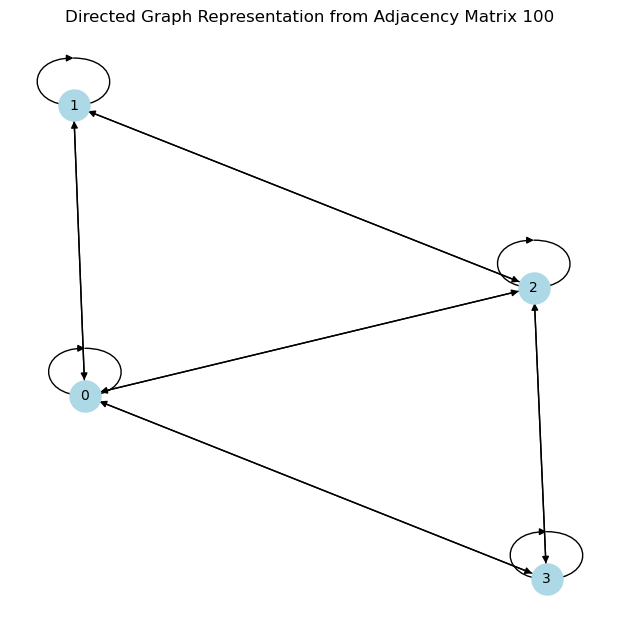

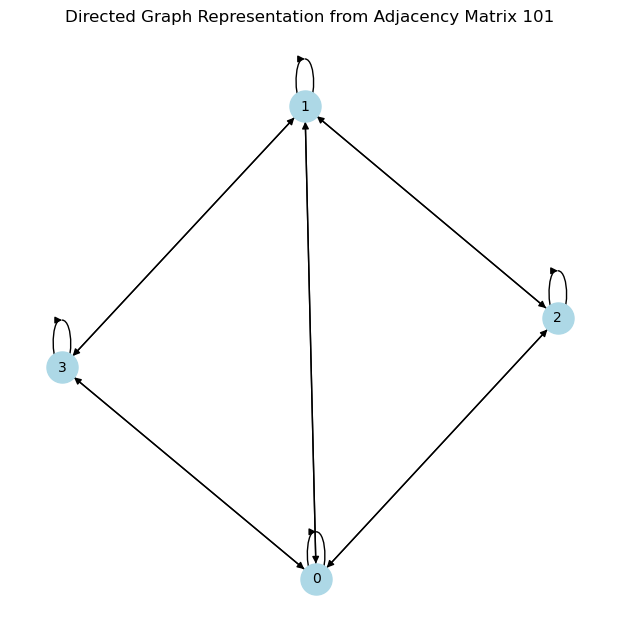

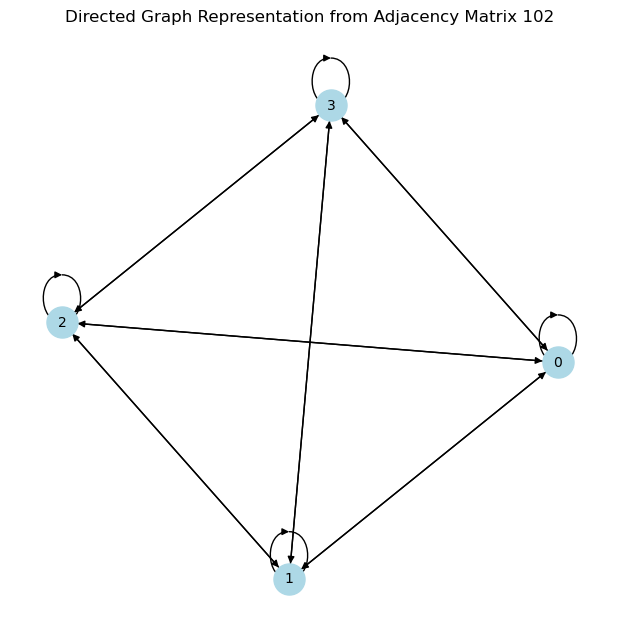

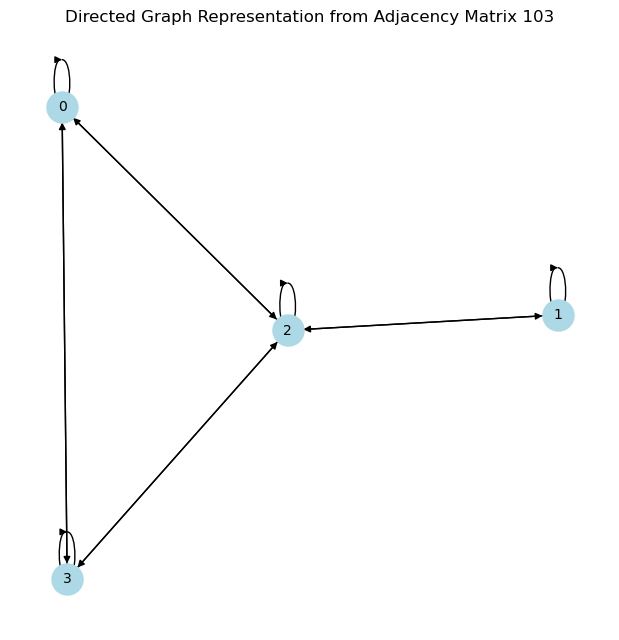

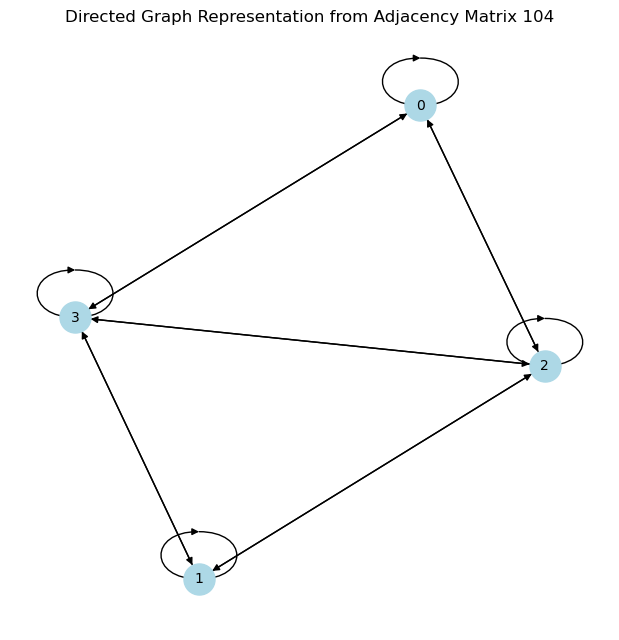

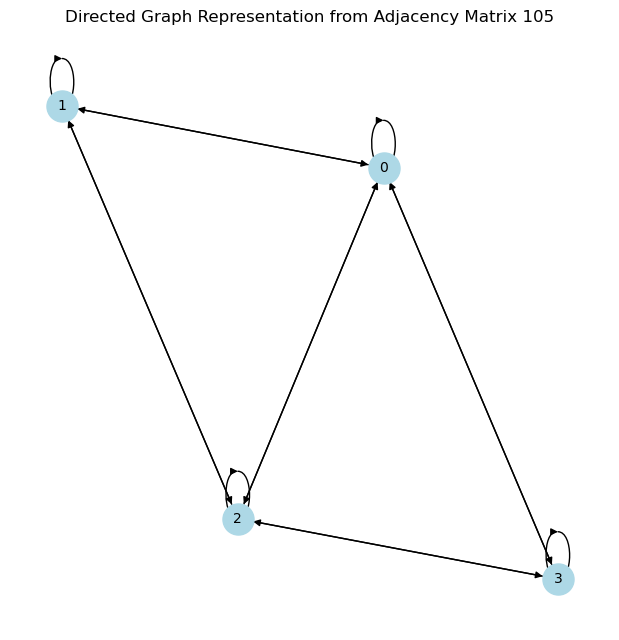

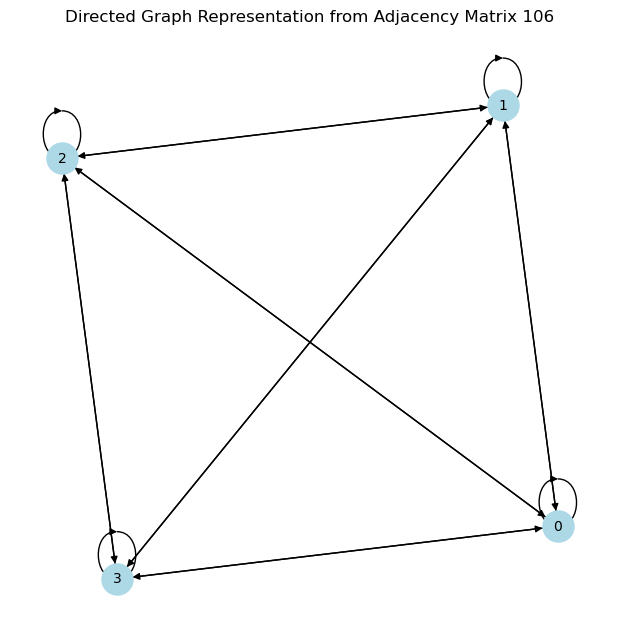

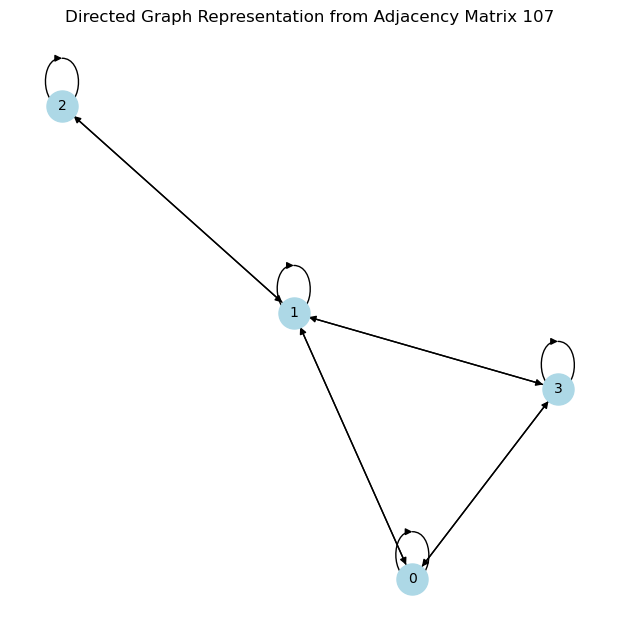

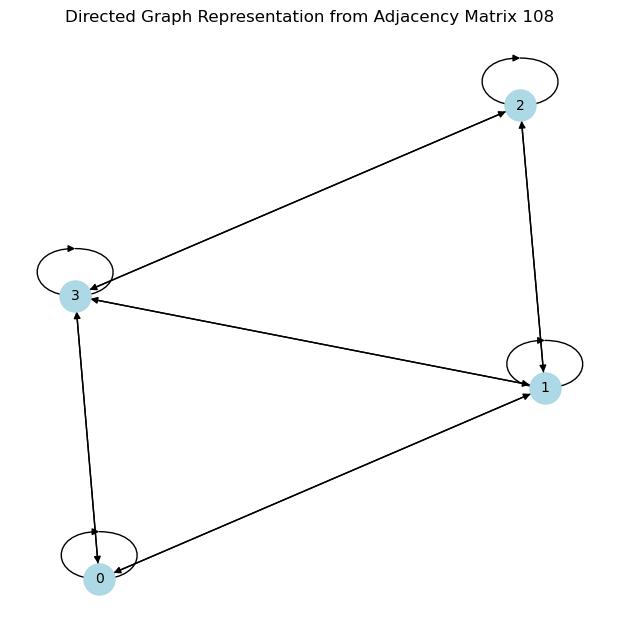

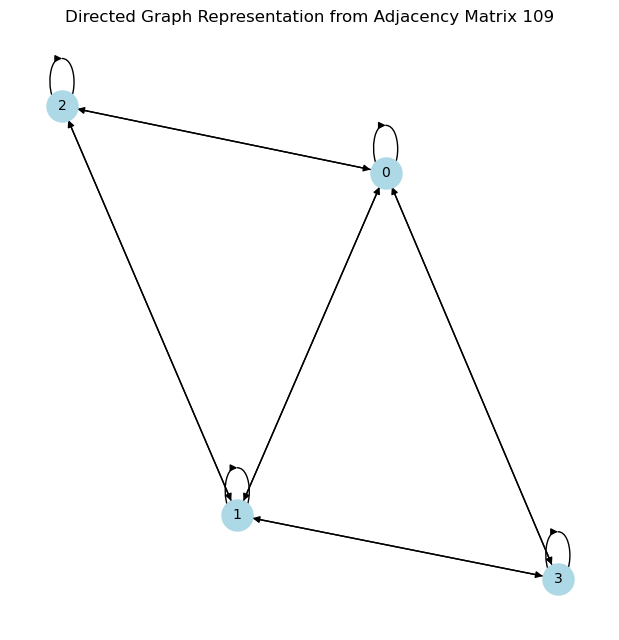

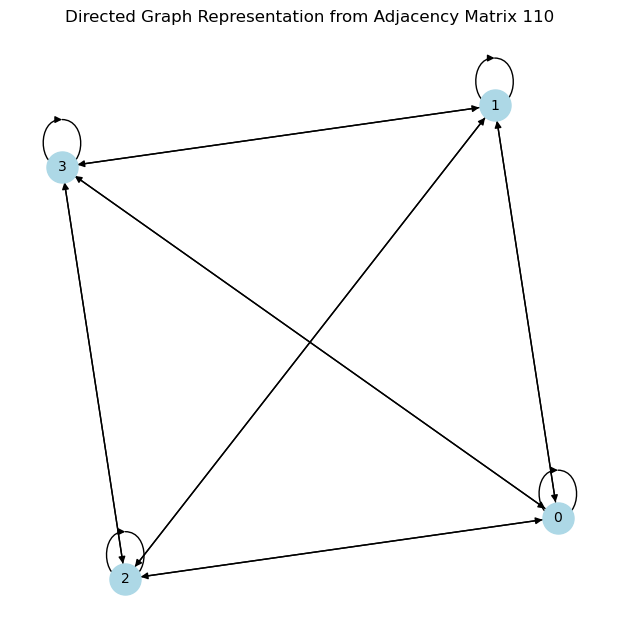

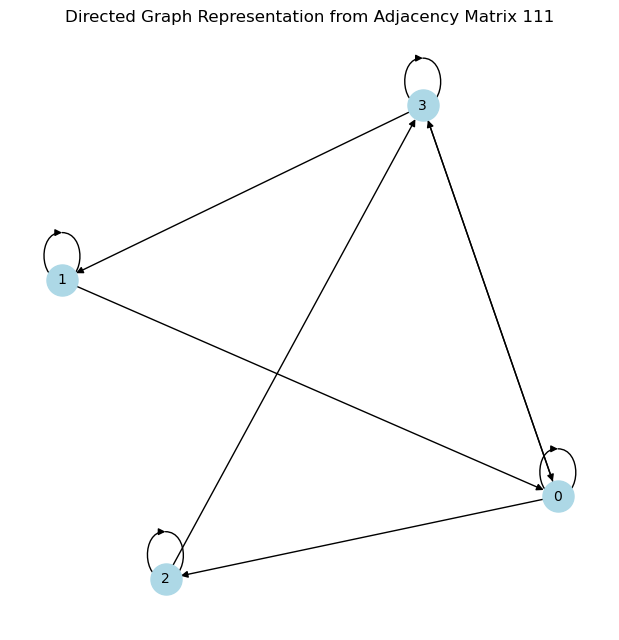

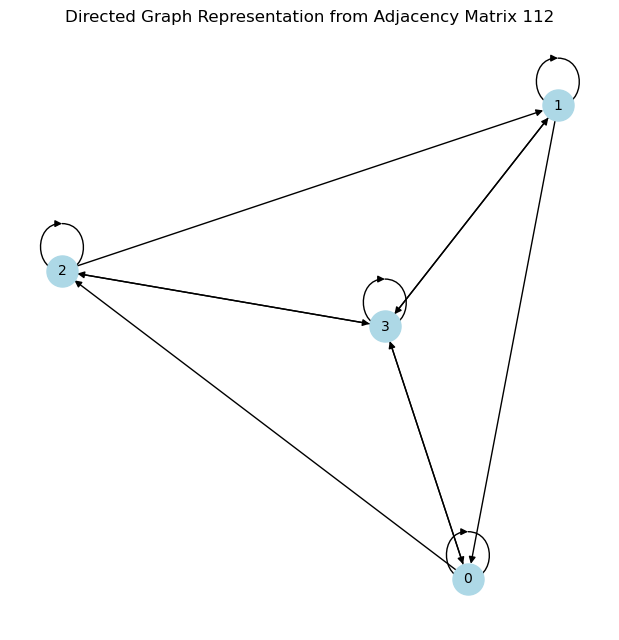

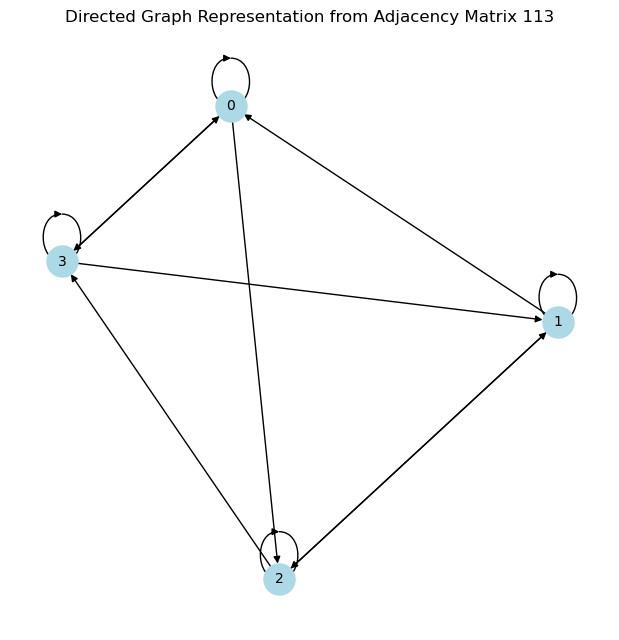

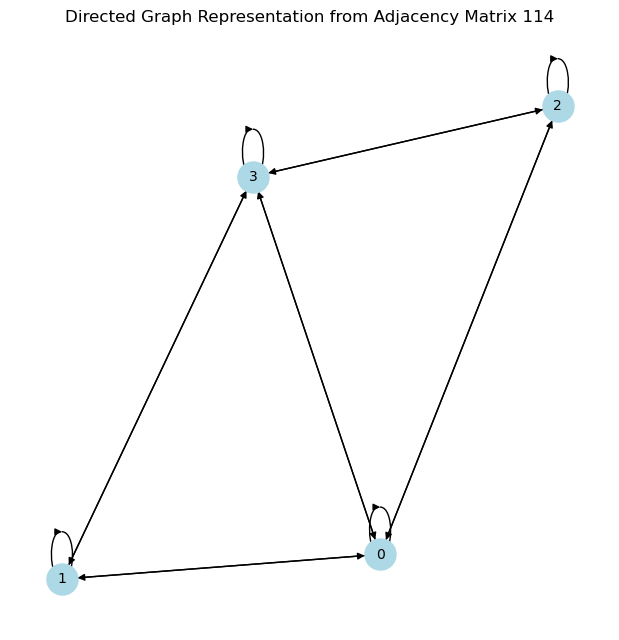

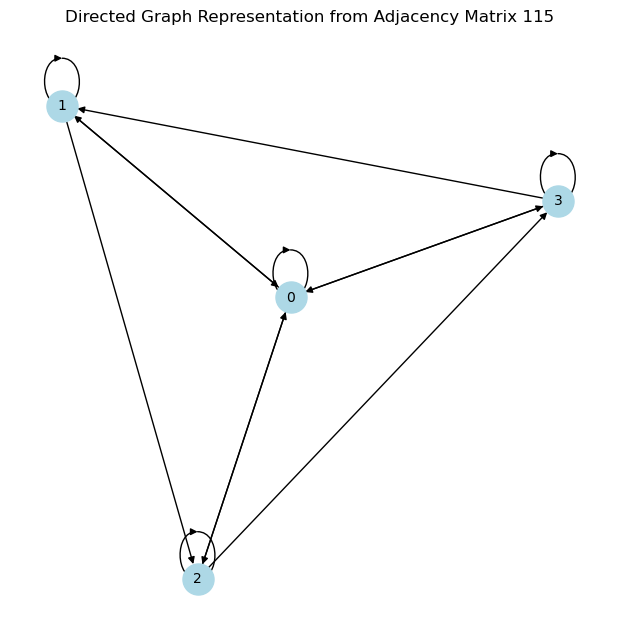

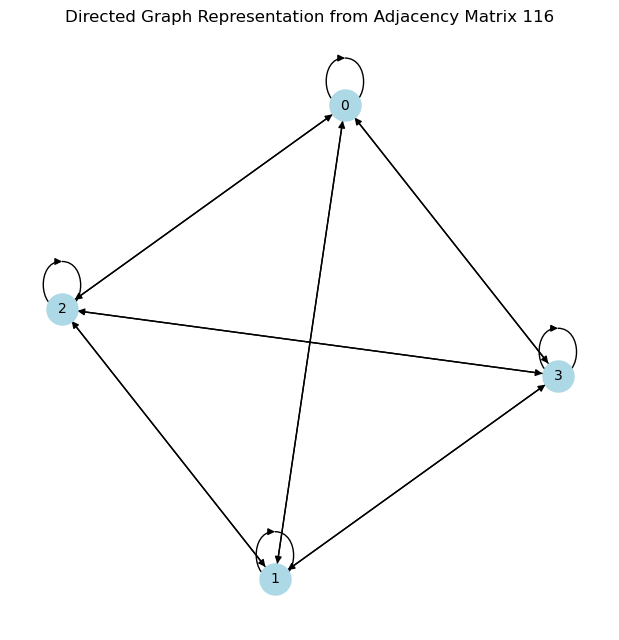

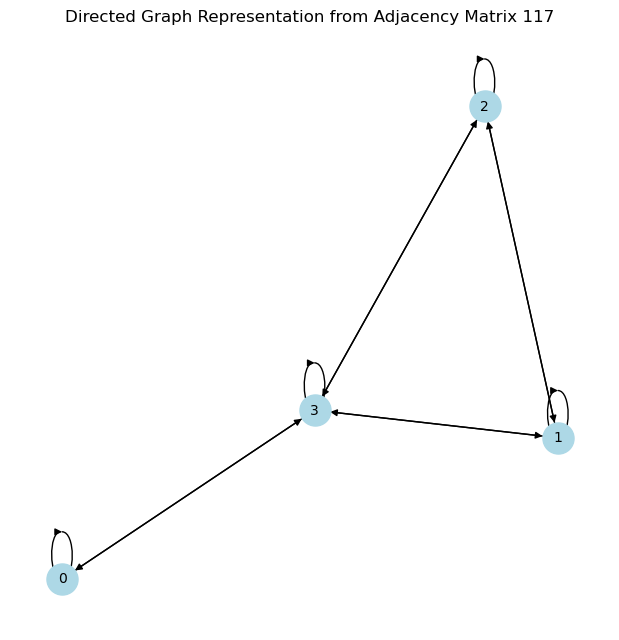

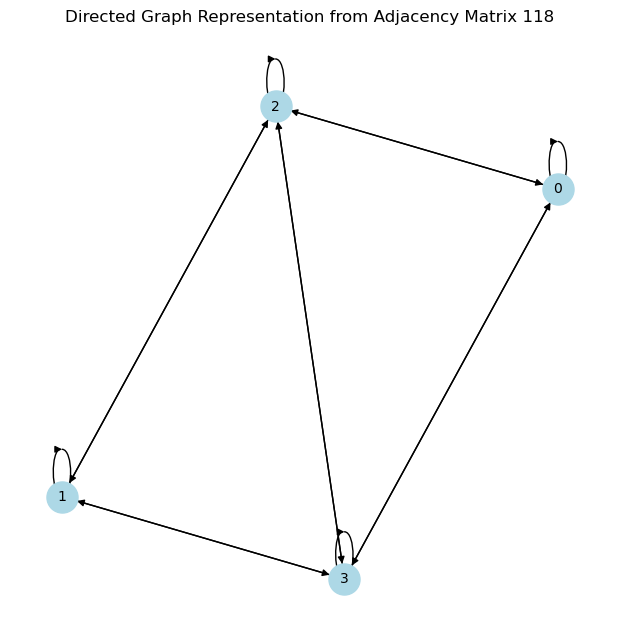

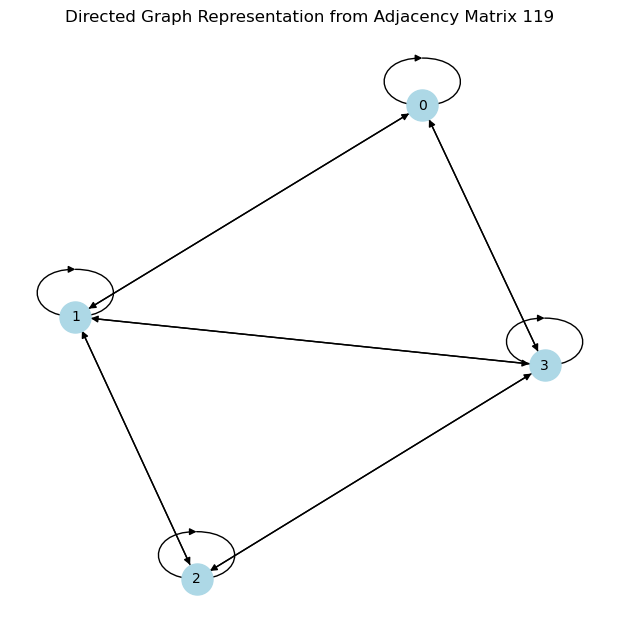

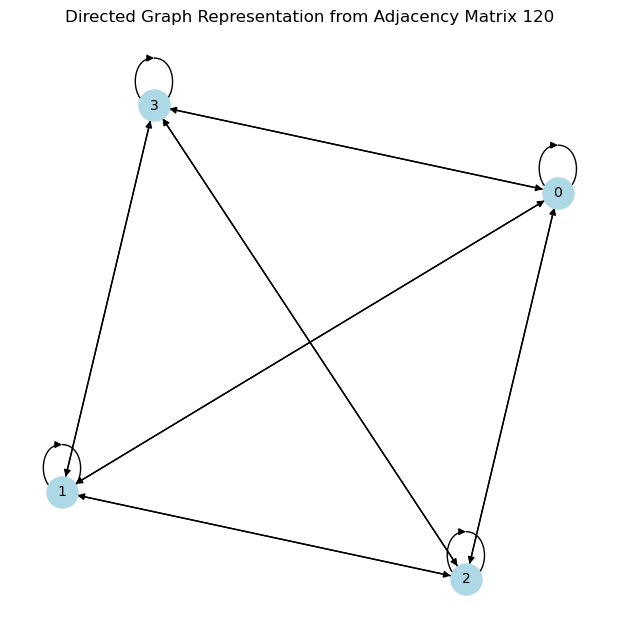

In [25]:
# Load the adjacency matrix file
file_path = 'output_diagonal.csv'
adjacency_matrix = pd.read_csv(file_path)

# Function to process and plot directed graphs for all adjacency matrices in the dataframe
def plot_all_directed_graphs(adjacency_matrix_df):
    for index, row in adjacency_matrix_df.iterrows():
        matrix_string = row['Adjacency Matrix']
        # Convert string to a list of lists
        matrix = ast.literal_eval(matrix_string)
        # Create a directed graph from the adjacency matrix
        G = nx.from_numpy_array(pd.DataFrame(matrix).values, create_using=nx.DiGraph)
        
        # Plot the directed graph
        plt.figure(figsize=(6, 6))
        nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10, arrows=True)
        plt.title(f"Directed Graph Representation from Adjacency Matrix {index+1}")
        plt.show()

# Call the function to plot all directed graphs
plot_all_directed_graphs(adjacency_matrix)

In [27]:
import pandas as pd
import ast
import networkx as nx

# Load the adjacency matrix file
file_path = 'output_diagonal.csv'
adjacency_matrix = pd.read_csv(file_path)

# Function to generate directed graphs from adjacency matrices
def generate_directed_graphs(adjacency_matrix_df):
    graphs = []
    for index, row in adjacency_matrix_df.iterrows():
        matrix_string = row['Adjacency Matrix']
        # Convert string to a list of lists
        matrix = ast.literal_eval(matrix_string)
        # Create a directed graph from the adjacency matrix
        G = nx.from_numpy_array(pd.DataFrame(matrix).values, create_using=nx.DiGraph)
        graphs.append(G)
    return graphs

# Function to check which graphs are isomorphic
def check_isomorphic(graphs):
    isomorphic_pairs = []
    num_graphs = len(graphs)
    
    # Compare each graph with every other graph
    for i in range(num_graphs):
        for j in range(i + 1, num_graphs):
            if nx.is_isomorphic(graphs[i], graphs[j], node_match=None, edge_match=None):
                isomorphic_pairs.append((i+1, j+1))  # Storing 1-based indices for readability
    return isomorphic_pairs

# Generate the directed graphs
graphs = generate_directed_graphs(adjacency_matrix)

# Check for isomorphic graphs
isomorphic_pairs = check_isomorphic(graphs)

# Output the results
if isomorphic_pairs:
    print("The following graphs are isomorphic:")
    for pair in isomorphic_pairs:
        print(f"Graph {pair[0]} is isomorphic to Graph {pair[1]}")
else:
    print("No isomorphic graphs found.")


The following graphs are isomorphic:
Graph 1 is isomorphic to Graph 7
Graph 1 is isomorphic to Graph 13
Graph 1 is isomorphic to Graph 19
Graph 1 is isomorphic to Graph 25
Graph 1 is isomorphic to Graph 31
Graph 1 is isomorphic to Graph 49
Graph 1 is isomorphic to Graph 55
Graph 1 is isomorphic to Graph 65
Graph 1 is isomorphic to Graph 79
Graph 1 is isomorphic to Graph 93
Graph 1 is isomorphic to Graph 111
Graph 2 is isomorphic to Graph 10
Graph 2 is isomorphic to Graph 14
Graph 2 is isomorphic to Graph 23
Graph 2 is isomorphic to Graph 27
Graph 2 is isomorphic to Graph 35
Graph 2 is isomorphic to Graph 50
Graph 2 is isomorphic to Graph 56
Graph 2 is isomorphic to Graph 66
Graph 2 is isomorphic to Graph 80
Graph 2 is isomorphic to Graph 95
Graph 2 is isomorphic to Graph 113
Graph 3 is isomorphic to Graph 4
Graph 3 is isomorphic to Graph 8
Graph 3 is isomorphic to Graph 11
Graph 3 is isomorphic to Graph 15
Graph 3 is isomorphic to Graph 16
Graph 3 is isomorphic to Graph 21
Graph 3 is i

The following graphs are isomorphic:
Graph 3 is isomorphic to Graph 4


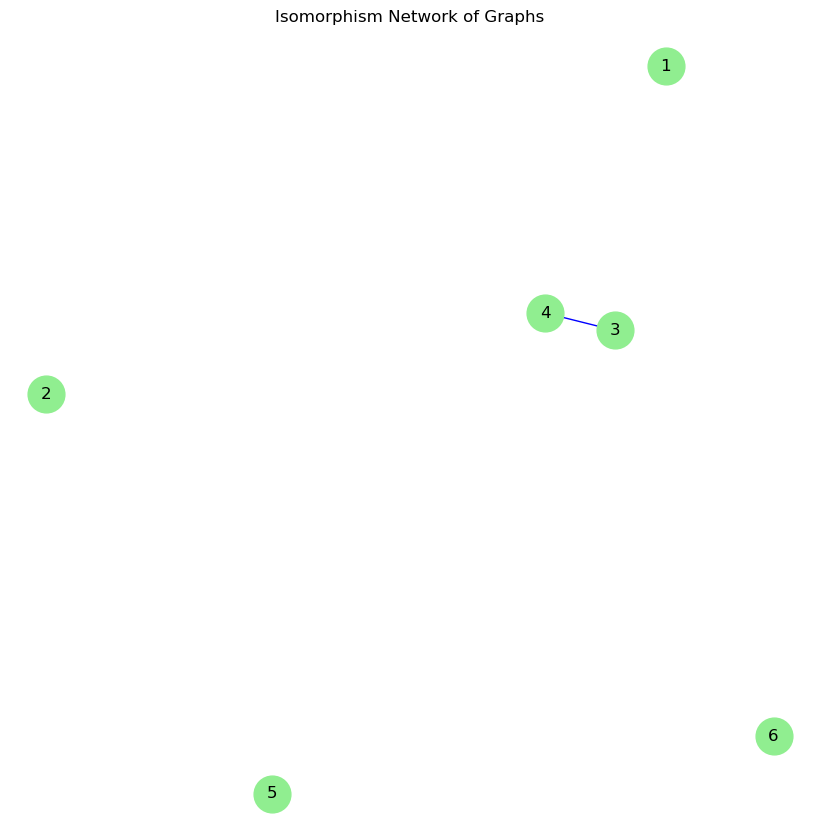

In [30]:
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt

# Load the adjacency matrix file
file_path = 'output_diagonal.csv'
adjacency_matrix = pd.read_csv(file_path)
adjacency_matrix= adjacency_matrix.loc[adjacency_matrix["Operation Table"]=="[[0,0,1,1],[2,2,3,3],[0,0,1,1],[2,2,3,3]]"]
# Function to generate directed graphs from adjacency matrices
def generate_directed_graphs(adjacency_matrix_df):
    graphs = []
    for index, row in adjacency_matrix_df.iterrows():
        matrix_string = row['Adjacency Matrix']
        # Convert string to a list of lists
        matrix = ast.literal_eval(matrix_string)
        # Create a directed graph from the adjacency matrix
        G = nx.from_numpy_array(pd.DataFrame(matrix).values, create_using=nx.DiGraph)
        graphs.append(G)
    return graphs

# Function to check which graphs are isomorphic
def check_isomorphic(graphs):
    isomorphic_pairs = []
    num_graphs = len(graphs)
    
    # Compare each graph with every other graph
    for i in range(num_graphs):
        for j in range(i + 1, num_graphs):
            if nx.is_isomorphic(graphs[i], graphs[j], node_match=None, edge_match=None):
                isomorphic_pairs.append((i+1, j+1))  # Storing 1-based indices for readability
    return isomorphic_pairs

# Function to plot the isomorphic relationships as a network
def plot_isomorphic_network(isomorphic_pairs, num_graphs):
    G_iso = nx.Graph()  # Create an undirected graph for isomorphism relationships

    # Add nodes representing each graph
    G_iso.add_nodes_from(range(1, num_graphs + 1))

    # Add edges between isomorphic graphs
    G_iso.add_edges_from(isomorphic_pairs)

    # Plot the isomorphism network
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G_iso)
    nx.draw(G_iso, pos, with_labels=True, node_color='lightgreen', node_size=700, font_size=12, edge_color='blue')
    plt.title("Isomorphism Network of Graphs")
    plt.show()

# Generate the directed graphs
graphs = generate_directed_graphs(adjacency_matrix)

# Check for isomorphic graphs
isomorphic_pairs = check_isomorphic(graphs)

# Plot the isomorphism network if there are isomorphic graphs
if isomorphic_pairs:
    print("The following graphs are isomorphic:")
    for pair in isomorphic_pairs:
        print(f"Graph {pair[0]} is isomorphic to Graph {pair[1]}")
    
    # Plot the isomorphic network
    plot_isomorphic_network(isomorphic_pairs, len(graphs))
else:
    print("No isomorphic graphs found.")
